In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # para un mejor despliegue de los gráficos
sns.set_theme(color_codes=True)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files

uploaded = files.upload()

Saving DNMX Database to upload 240605.xlsx to DNMX Database to upload 240605.xlsx


In [3]:
# Dandole una variable al archivo cargado
file_name = list(uploaded.keys())[0]

# Leer el archivo Excel
df = pd.read_excel(file_name)

# Mostrar las primeras filas del DataFrame
df.head()

ID  Dep. No.                      Dep. Name  \
0  2610      1232  Logistics (SPP, WH Expansion)   
1  2987      1232  Logistics (SPP, WH Expansion)   
2  3021      1238      Logistics Components (EC)   
3  3033      1233            Logistics (Thermal)   
4  3042      1238      Logistics Components (EC)   

                             Department Dep. Class  Chief ID  Position Level  \
0  1232 - Logistics (SPP, WH Expansion)     Common        20              14   
1  1232 - Logistics (SPP, WH Expansion)     Common      1332              12   
2      1238 - Logistics Components (EC)  Exclusive      4967               8   
3            1233 - Logistics (Thermal)     Common      4967               7   
4      1238 - Logistics Components (EC)  Exclusive      4967               7   

        Subposition           Position ID     Position Name  Employee Type  \
0   Gerente General  14 - Gerente General   General Manager       Empleado   
1        Subgerente       12 - Subgerente        Subgerente       Empleado   
2          Sublider          8 - Sublider         Warehouse       Empleado   
3  Operador Experto  7 - Operador Experto  Operador Experto  Sindicalizado   
4  Operador Experto  7 - Operador Experto  Operador Experto  Sindicalizado   

  Nacionality  Employee Type ID  Status Turn Code  Hire Date  Hire Month Date  \
0    Mexicano                 2  Active      4161 2005-04-11                4   
1    Mexicano                 2    Quit      4161 2013-01-07                1   
2    Mexicano                 2  Active     14282 2013-08-12                8   
3    Mexicano                 1    Quit     14283 2013-09-23                9   
4    Mexicano                 1    Quit     14281 2013-10-28               10   

   Hire Year Date   End Date  Resign Month Date  Resign Year Date  Gender  \
0            2005 2024-05-12                  5              2024    Male   
1            2013 2023-01-01                  1              2023  Female   
2            2013 2024-05-12                  5              2024    Male   
3            2013 2023-01-01                  1              2023    Male   
4            2013 2023-01-01                  1              2023    Male   

   Years in Company  Avg. Years Position  Attrition 3 years Plant    Type  \
0         19.098630            13.378555                  1   SPP  Direct   
1          9.989041            13.848762                  1   SPP  Direct   
2         10.756164            12.325648                  1   SPP  Direct   
3          9.279452            11.817589                  1   SPP  Direct   
4          9.183562            11.817589                  1   SPP  Direct   

   Type.1    Target                   Category  Function            Area  \
0  Direct  3.604447  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)   
1  Direct  3.604447  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)   
2  Direct  3.604447  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)   
3  Direct  3.604447  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)   
4  Direct  3.604447  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)   

  Business Unit            Manager             GM                Director  \
0        Common  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez   
1        Common  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez   
2            EC  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez   
3       Thermal  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez   
4            EC  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez   

              VP              BP      mgr_spoc       gm_spoc      dir_spoc  \
0  Takuya Suzuki  Laura González  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81   
1  Takuya Suzuki  Laura González  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81   
2  Takuya Suzuki  Hiroshi Tanaka  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81   
3  Takuya Suzuki   Kazuki Suzuki  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81   
4  Takuya Suzuki  H

In [4]:
#from google.colab import drive

#drive.mount('/content/drive')

#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Carlos
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Miguel
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Javier
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Luisiana
#df = pd.read_csv("/content/drive/MyDrive/file.csv") #Hernán

#df.head(3)

In [5]:
# Cargar base de datos de manera local:
# df = pd.read_csv(local_path)
# df.head(3)

Antes que nada busquemos columnas con renglones vacíos

In [6]:
# Calcular la cantidad de valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar para mostrar solo aquellos que son diferentes de cero
null_counts_nonzero = null_counts[null_counts != 0]

# Mostrar los resultados
print("Cantidad de valores nulos por columna que son diferentes de cero:")
print(null_counts_nonzero)

Cantidad de valores nulos por columna que son diferentes de cero:
Series([], dtype: int64)


Y entendamos el tipo de dato para cada columna

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   9240 non-null   int64         
 1   Dep. No.             9240 non-null   int64         
 2   Dep. Name            9240 non-null   object        
 3   Department           9240 non-null   object        
 4   Dep. Class           9240 non-null   object        
 5   Chief ID             9240 non-null   int64         
 6   Position Level       9240 non-null   int64         
 7   Subposition          9240 non-null   object        
 8   Position ID          9240 non-null   object        
 9   Position Name        9240 non-null   object        
 10  Employee Type        9240 non-null   object        
 11  Nacionality          9240 non-null   object        
 12  Employee Type ID     9240 non-null   int64         
 13  Status               9240 non-nul

In [8]:
df.nunique()

ID                     9240
Dep. No.                286
Dep. Name               284
Department              286
Dep. Class                2
Chief ID                446
Position Level           17
Subposition              27
Position ID              27
Position Name            96
Employee Type             5
Nacionality               2
Employee Type ID          5
Status                    3
Turn Code                13
Hire Date              1469
Hire Month Date          12
Hire Year Date           30
End Date                  3
Resign Month Date         3
Resign Year Date          2
Gender                    2
Years in Company       1528
Avg. Years Position      27
Attrition 3 years         2
Plant                     4
Type                      3
Type.1                    2
Target                   23
Category                 16
Function                 47
Area                     83
Business Unit            16
Manager                  76
GM                       36
Director            

###**Análisis exploratorio variables numéricas**

Ahora separemos nuestra variable predictora de nuestra base de datos.

In [9]:
# Separamos los factores de entrada y la variable de salida:
X = df.drop('Attrition 3 years', axis=1)
y = df['Attrition 3 years']

**Separamos la dimensión obtenida de los dos conjuntos: Entrenamiento y Prueba.**

In [10]:
# Dividir los datos en entrenamiento (80%) y temporal (20%)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state= 0)

print("Entrenamiento X:", Xtrain.shape,    '%.1f%%' % (100 * Xtrain.shape[0]  / (Xtrain.shape[0] + Xtest.shape[0] )))
print("Prueba        X:", Xtest.shape,     '%.1f%%' % (100 * Xtest.shape[0]   / (Xtrain.shape[0] + Xtest.shape[0] )))

print("Entrenamiento y:", ytrain.shape,    '%.1f%%' % (100 * ytrain.shape[0]  / (ytrain.shape[0] + ytest.shape[0] )))
print("Prueba        y:", ytest.shape,     '%.1f%%' % (100 * ytest.shape[0]   / (ytrain.shape[0] + ytest.shape[0] )))

Entrenamiento X: (7392, 48) 80.0%
Prueba        X: (1848, 48) 20.0%
Entrenamiento y: (7392,) 80.0%
Prueba        y: (1848,) 20.0%


In [11]:
Xtrain

ID  Dep. No.                      Dep. Name  \
295   8894      1732                Logistics (M&L)   
1657  4303       351               VCT Measurements   
4592  4586      1362                        HVAC L3   
3558  1755       261                    Fuel Sender   
629   2698      3239                        SCM SDA   
...    ...       ...                            ...   
7891  4850      2257                  ARM Packaging   
9225  8999       273                            HUD   
4859  8797      1375                         ECF L2   
3264  8022       887                    NCS Molding   
2732  9180       375  VB Assembly and Inspection L2   

                               Department Dep. Class  Chief ID  \
295                1732 - Logistics (M&L)  Exclusive      4967   
1657               351 - VCT Measurements  Exclusive       596   
4592                       1362 - HVAC L3  Exclusive      1722   
3558                    261 - Fuel Sender  Exclusive       988   
629                        3239 - SCM SDA     Common      5040   
...                                   ...        ...       ...   
7891                 2257 - ARM Packaging  Exclusive      4973   
9225                            273 - HUD  Exclusive       811   
4859                        1375 - ECF L2  Exclusive      3110   
3264                    887 - NCS Molding  Exclusive       811   
2732  375 - VB Assembly and Inspection L2  Exclusive       811   

      Position Level       Subposition           Position ID  \
295                1  Entrenamiento B1  1 - Entrenamiento B1   
1657               9     Jefe De Grupo     9 - Jefe De Grupo   
4592               4   Operador Junior   4 - Operador Junior   
3558               5          Operador          5 - Operador   
629               13           Gerente          13 - Gerente   
...              ...               ...                   ...   
7891               5          Operador          5 - Operador   
9225               2          C Mejora          2 - C Mejora   
4859               1  Entrenamiento B1  1 - Entrenamiento B1   
3264               2          C Mejora          2 - C Mejora   
2732               2          C Mejora          2 - C Mejora   

         Position Name  Employee Type Nacionality  Employee Type ID  Status  \
295   Entrenamiento B1  Sindicalizado    Mexicano                 1    Quit   
1657        Production       Empleado    Mexicano                 2  Active   
4592   Operador Junior  Sindicalizado    Mexicano                 1  Active   
3558          Operador  Sindicalizado    Mexicano                 1  Active   
629        Procurement       Empleado    Mexicano                 2  Active   
...                ...            ...         ...               ...     ...   
7891          Operador  Sindicalizado    Mexicano                 1    Quit   
9225          C Mejora  Sindicalizado    Mexicano                 1    Quit   
4859  Entrenamiento B1  Sindicalizado    Mexicano                 1    Quit   
3264          C Mejora  Sindicalizado    Mexicano                 1    Quit   
2732          C Mejora  Sindicalizado    Mexicano                 1    Quit   

     Turn Code  Hire Date  Hire Month Date  Hire Year Date   End Date  \
295      14281 2024-02-16                2            2024 2024-04-01   
1657      4161 2019-09-17                9            2019 2024-05-12   
4592     14281 2020-11-17               11            2020 2024-05-12   
3558      4159 2015-07-20                7            2015 2024-05-12   
629       4161 2007-04-09                4            2007 2024-05-12   
...        ...        ...              ...             ...        ...   
7891     14281 2019-09-17                9            2019 2023-01-01   
9225      4162 2024-02-28                2            2024 2024-04-01   
4859     14281 2024-02-09                2            2024 2024-04-01   
3264      4162 2023-11-21               11            2023 2024-04-01   
2732      4162 2024-03-18        

En nuestro analisis inicial, realizaremos pruebas de correlaciones para nuestros datos numéricos y así identificar todas aquellas probables variables que no estarían proporcionando información adicional significativa sobre la rotación.

Primero seleccionamos las variables numéricas


In [12]:
def select_numeric_variables(data):
    """
    Selecciona las variables numéricas de un DataFrame.

    Args:
    - df: DataFrame. El DataFrame del cual seleccionar las variables numéricas.

    Returns:
    - num_vars: DataFrame. Un DataFrame que contiene solo las variables numéricas del DataFrame original.
    """
    # Seleccionar solo las columnas con tipos de datos numéricos
    num_vars = df.select_dtypes(include=['int64', 'float64'])

    return num_vars

# Llamar a la función y guardar el resultado en una variable
num_vars = select_numeric_variables(Xtrain)

In [13]:
num_vars.head()

ID  Dep. No.  Chief ID  Position Level  Employee Type ID  \
0  2610      1232        20              14                 2   
1  2987      1232      1332              12                 2   
2  3021      1238      4967               8                 2   
3  3033      1233      4967               7                 1   
4  3042      1238      4967               7                 1   

   Hire Month Date  Hire Year Date  Resign Month Date  Resign Year Date  \
0                4            2005                  5              2024   
1                1            2013                  1              2023   
2                8            2013                  5              2024   
3                9            2013                  1              2023   
4               10            2013                  1              2023   

   Years in Company  Avg. Years Position  Attrition 3 years    Target  
0         19.098630            13.378555                  1  3.604447  
1          9.989041            13.848762                  1  3.604447  
2         10.756164            12.325648                  1  3.604447  
3          9.279452            11.817589                  1  3.604447  
4          9.183562            11.817589                  1  3.604447

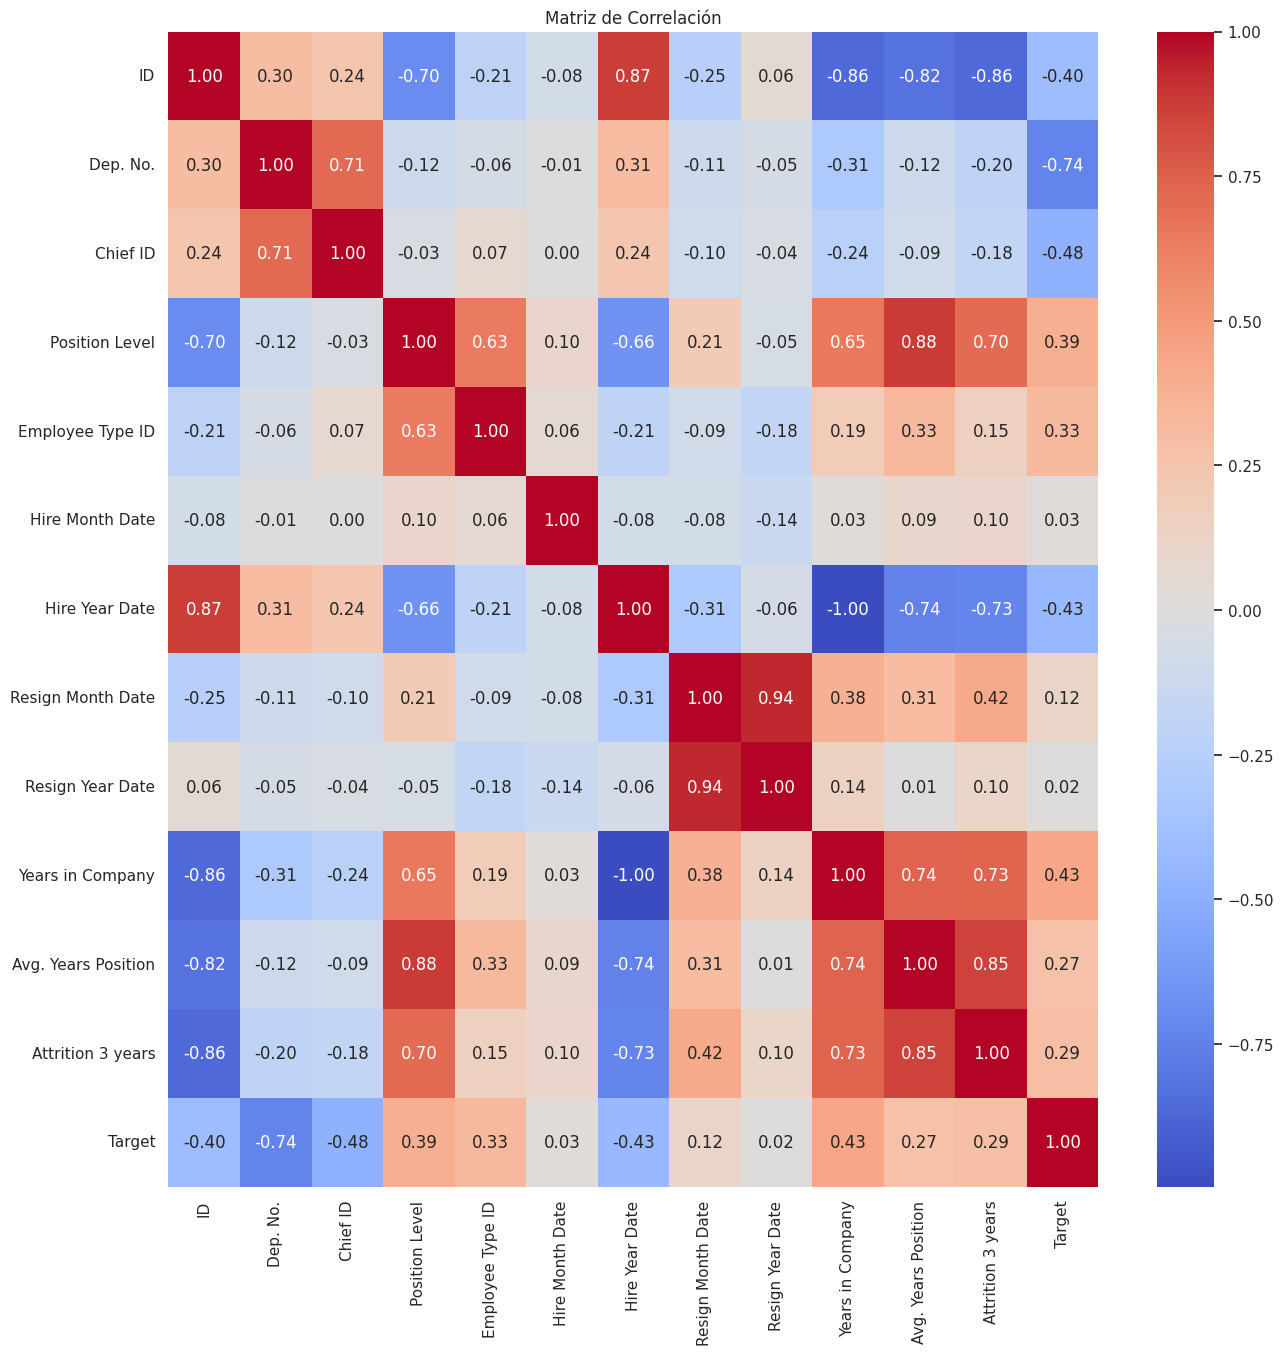

In [14]:
# Calcular la matriz de correlación entre las variables, solo tomará en cuenta las numéricas
correlation_matrix_Xtrain = num_vars.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_Xtrain, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

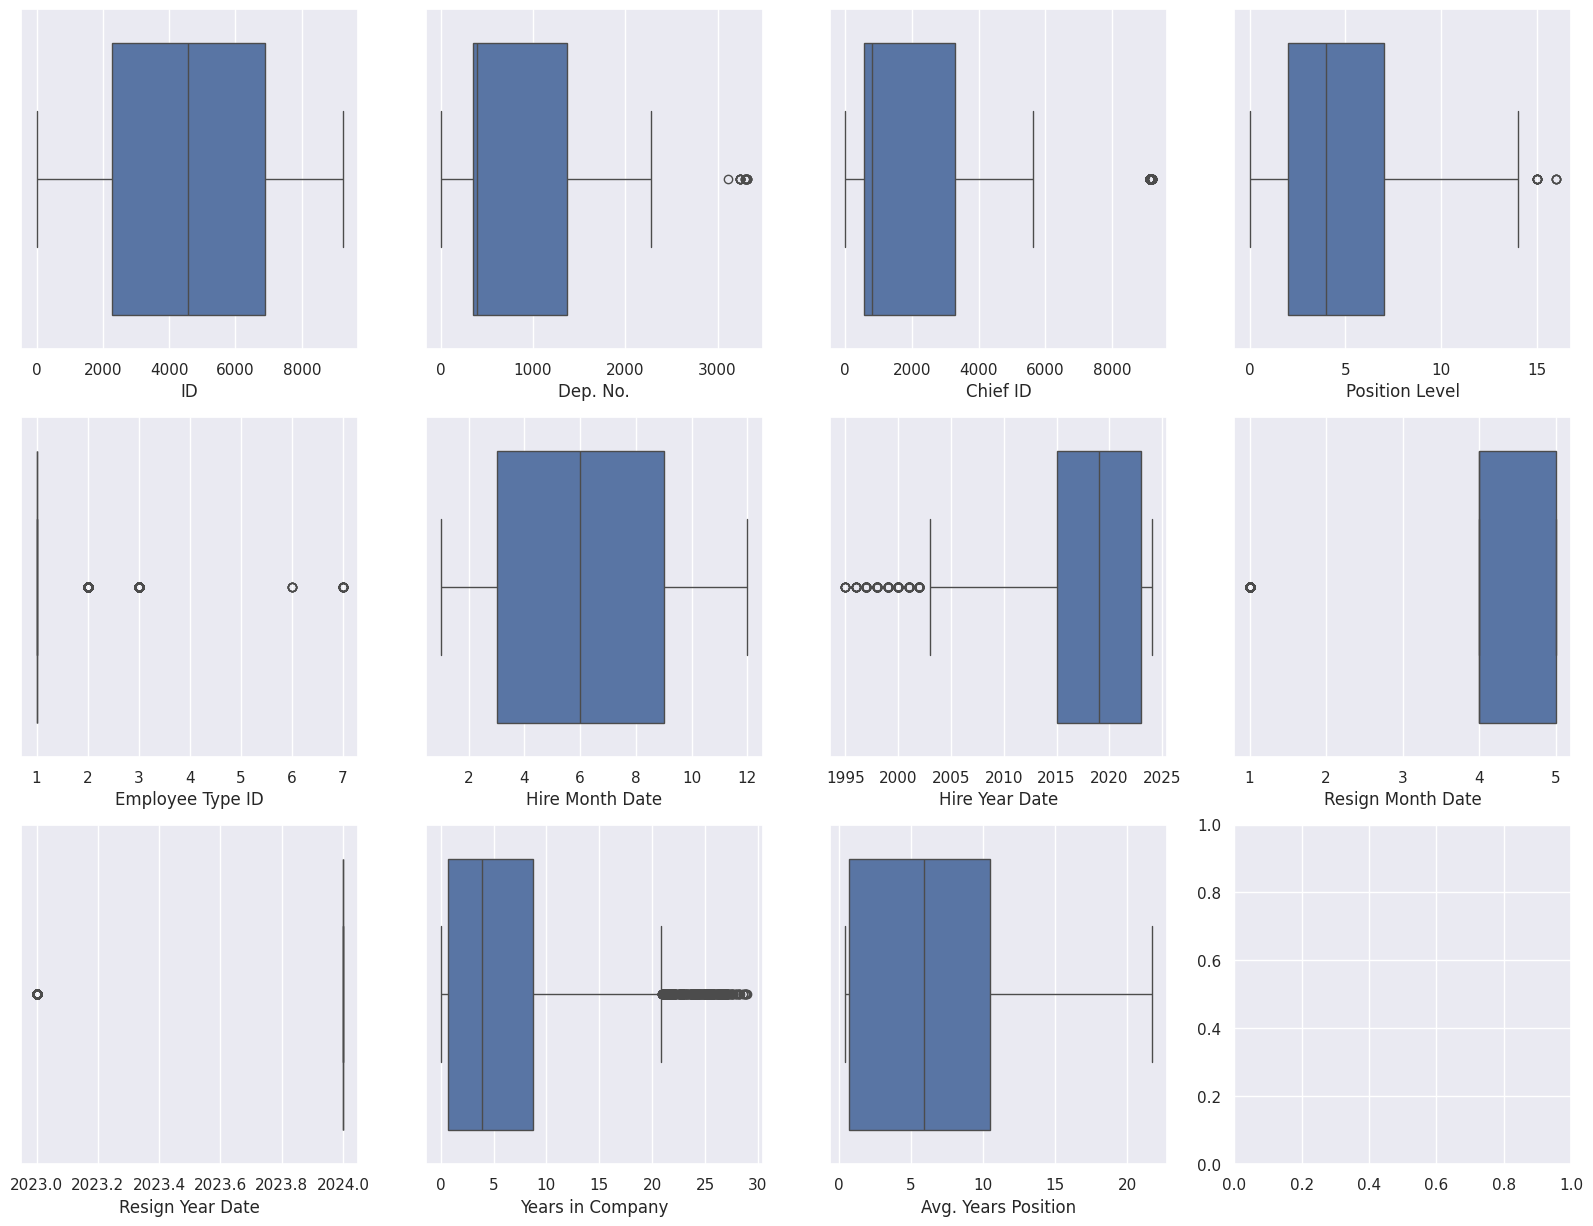

In [327]:
try:
  fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
  axs = axs.flatten()


  for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=Xtrain, ax=axs[i])

  fig.tight_layout()

  plt.show()

except ValueError:
  print()

In [320]:
num_vars.head()

ID  Dep. No.  Chief ID  Position Level  Employee Type ID  \
0  2610      1232        20              14                 2   
1  2987      1232      1332              12                 2   
2  3021      1238      4967               8                 2   
3  3033      1233      4967               7                 1   
4  3042      1238      4967               7                 1   

   Hire Month Date  Hire Year Date  Resign Month Date  Resign Year Date  \
0                4            2005                  5              2024   
1                1            2013                  1              2023   
2                8            2013                  5              2024   
3                9            2013                  1              2023   
4               10            2013                  1              2023   

   Years in Company  Avg. Years Position  Attrition 3 years    Target  
0         19.098630            13.378555                  1  3.604447  
1          9.989041            13.848762                  1  3.604447  
2         10.756164            12.325648                  1  3.604447  
3          9.279452            11.817589                  1  3.604447  
4          9.183562            11.817589                  1  3.604447

### **Hacemos un análisis exploratorio de los datos Categóricos**

In [16]:
#Creamos la lista sin la variable predictora
def select_categorical_variables(data):
    """
    Selecciona las variables categóricas de un DataFrame.

    Args:
    - df: DataFrame. El DataFrame del cual seleccionar las variables categóricas.

    Returns:
    - cat_vars: DataFrame. Un DataFrame que contiene solo las variables categóricas del DataFrame original.
    """
    # Seleccionar solo las columnas con tipos de datos de objeto (categóricas)
    cat_vars = df.select_dtypes(include=['object'])

    return cat_vars

# Llamar a la función y guardar el resultado en una variable
cat_vars = select_categorical_variables(Xtrain)
cat_vars.head()

Dep. Name                            Department  \
0  Logistics (SPP, WH Expansion)  1232 - Logistics (SPP, WH Expansion)   
1  Logistics (SPP, WH Expansion)  1232 - Logistics (SPP, WH Expansion)   
2      Logistics Components (EC)      1238 - Logistics Components (EC)   
3            Logistics (Thermal)            1233 - Logistics (Thermal)   
4      Logistics Components (EC)      1238 - Logistics Components (EC)   

  Dep. Class       Subposition           Position ID     Position Name  \
0     Common   Gerente General  14 - Gerente General   General Manager   
1     Common        Subgerente       12 - Subgerente        Subgerente   
2  Exclusive          Sublider          8 - Sublider         Warehouse   
3     Common  Operador Experto  7 - Operador Experto  Operador Experto   
4  Exclusive  Operador Experto  7 - Operador Experto  Operador Experto   

   Employee Type Nacionality  Status Turn Code  Gender Plant    Type  Type.1  \
0       Empleado    Mexicano  Active      4161    Male   SPP  Direct  Direct   
1       Empleado    Mexicano    Quit      4161  Female   SPP  Direct  Direct   
2       Empleado    Mexicano  Active     14282    Male   SPP  Direct  Direct   
3  Sindicalizado    Mexicano    Quit     14283    Male   SPP  Direct  Direct   
4  Sindicalizado    Mexicano    Quit     14281    Male   SPP  Direct  Direct   

                    Category  Function            Area Business Unit  \
0  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)        Common   
1  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)        Common   
2  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)            EC   
3  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)       Thermal   
4  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)            EC   

             Manager             GM                Director             VP  \
0  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
1  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
2  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
3  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
4  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   

               BP      mgr_spoc       gm_spoc      dir_spoc       vp_spoc  \
0  Laura González  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
1  Laura González  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
2  Hiroshi Tanaka  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
3   Kazuki Suzuki  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
4  Hiroshi Tanaka  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   

         bp_spoc NEW_Dep. Name                NEW_POSITION_2  \
0   bp_spoc_<924         Other  5. Gestión y Administración:   
1   bp_spoc_<924         Other  5. Gestión y Administración:   
2   bp_spoc_<924         Other  1. Producción y Operaciones:   
3  bp_spoc_>1454         Other  1. Producción y Operaciones:   
4   bp_spoc_<924         Other  1. Producción y Operaciones:   

                NEW_Category NEW_Function NEW_Area NEW_Business Unit  
0  DNMX | SPP Plant function     PC Bajio    OTHER            Common  
1  DNMX | SPP Plant function     PC Bajio    OTHER            Common  
2  DNMX | SPP Plant function     PC Bajio    OTHER                EC  
3  DNMX | SPP Plant function     PC Bajio    OTHER           Thermal  
4  DNMX | SPP Plant function     PC Bajio    OTHER                EC

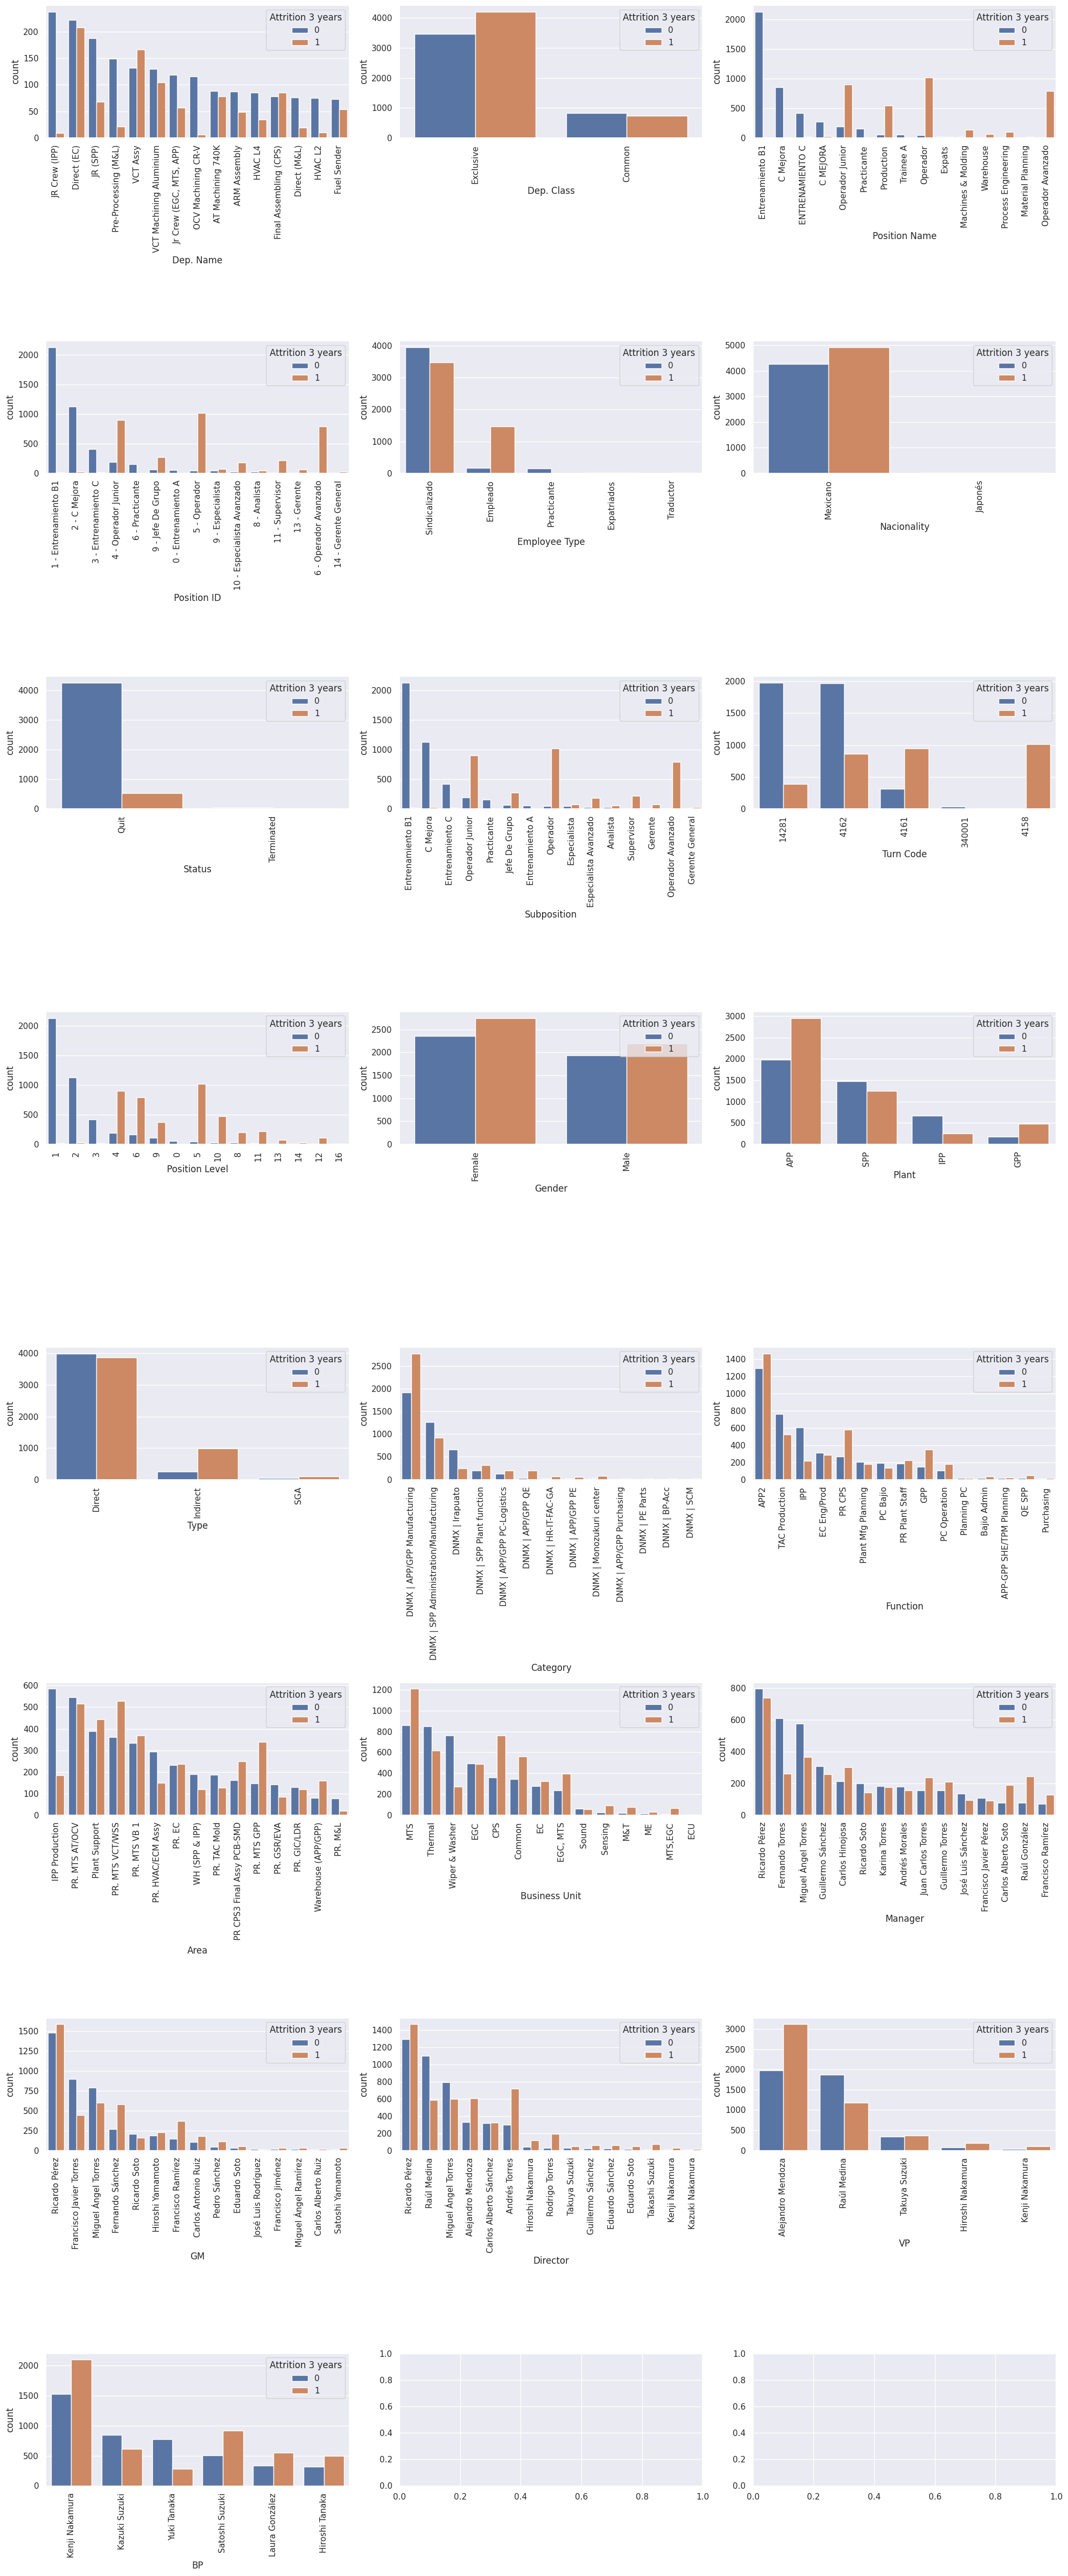

In [17]:
# Variables para filtrar y ordenar
filter_variables = [
    'Dep. Name', 'Dep. Class', 'Position Name', 'Position ID', 'Employee Type', 'Nacionality',
    'Status', 'Subposition', 'Turn Code', 'Position Level', 'Gender', 'Plant', 'Type', 'Category', 'Function',
    'Area', 'Business Unit', 'Manager', 'GM', 'Director', 'VP', 'BP'
]

# Crear figuras con subplots
num_plots = len(filter_variables)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calcular el número de filas necesario
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df[df['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Crear un countplot para la variable filtrada y ordenada
    sns.countplot(x=var, hue='Attrition 3 years', data=df, order=sorted_categories, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot
plt.show()

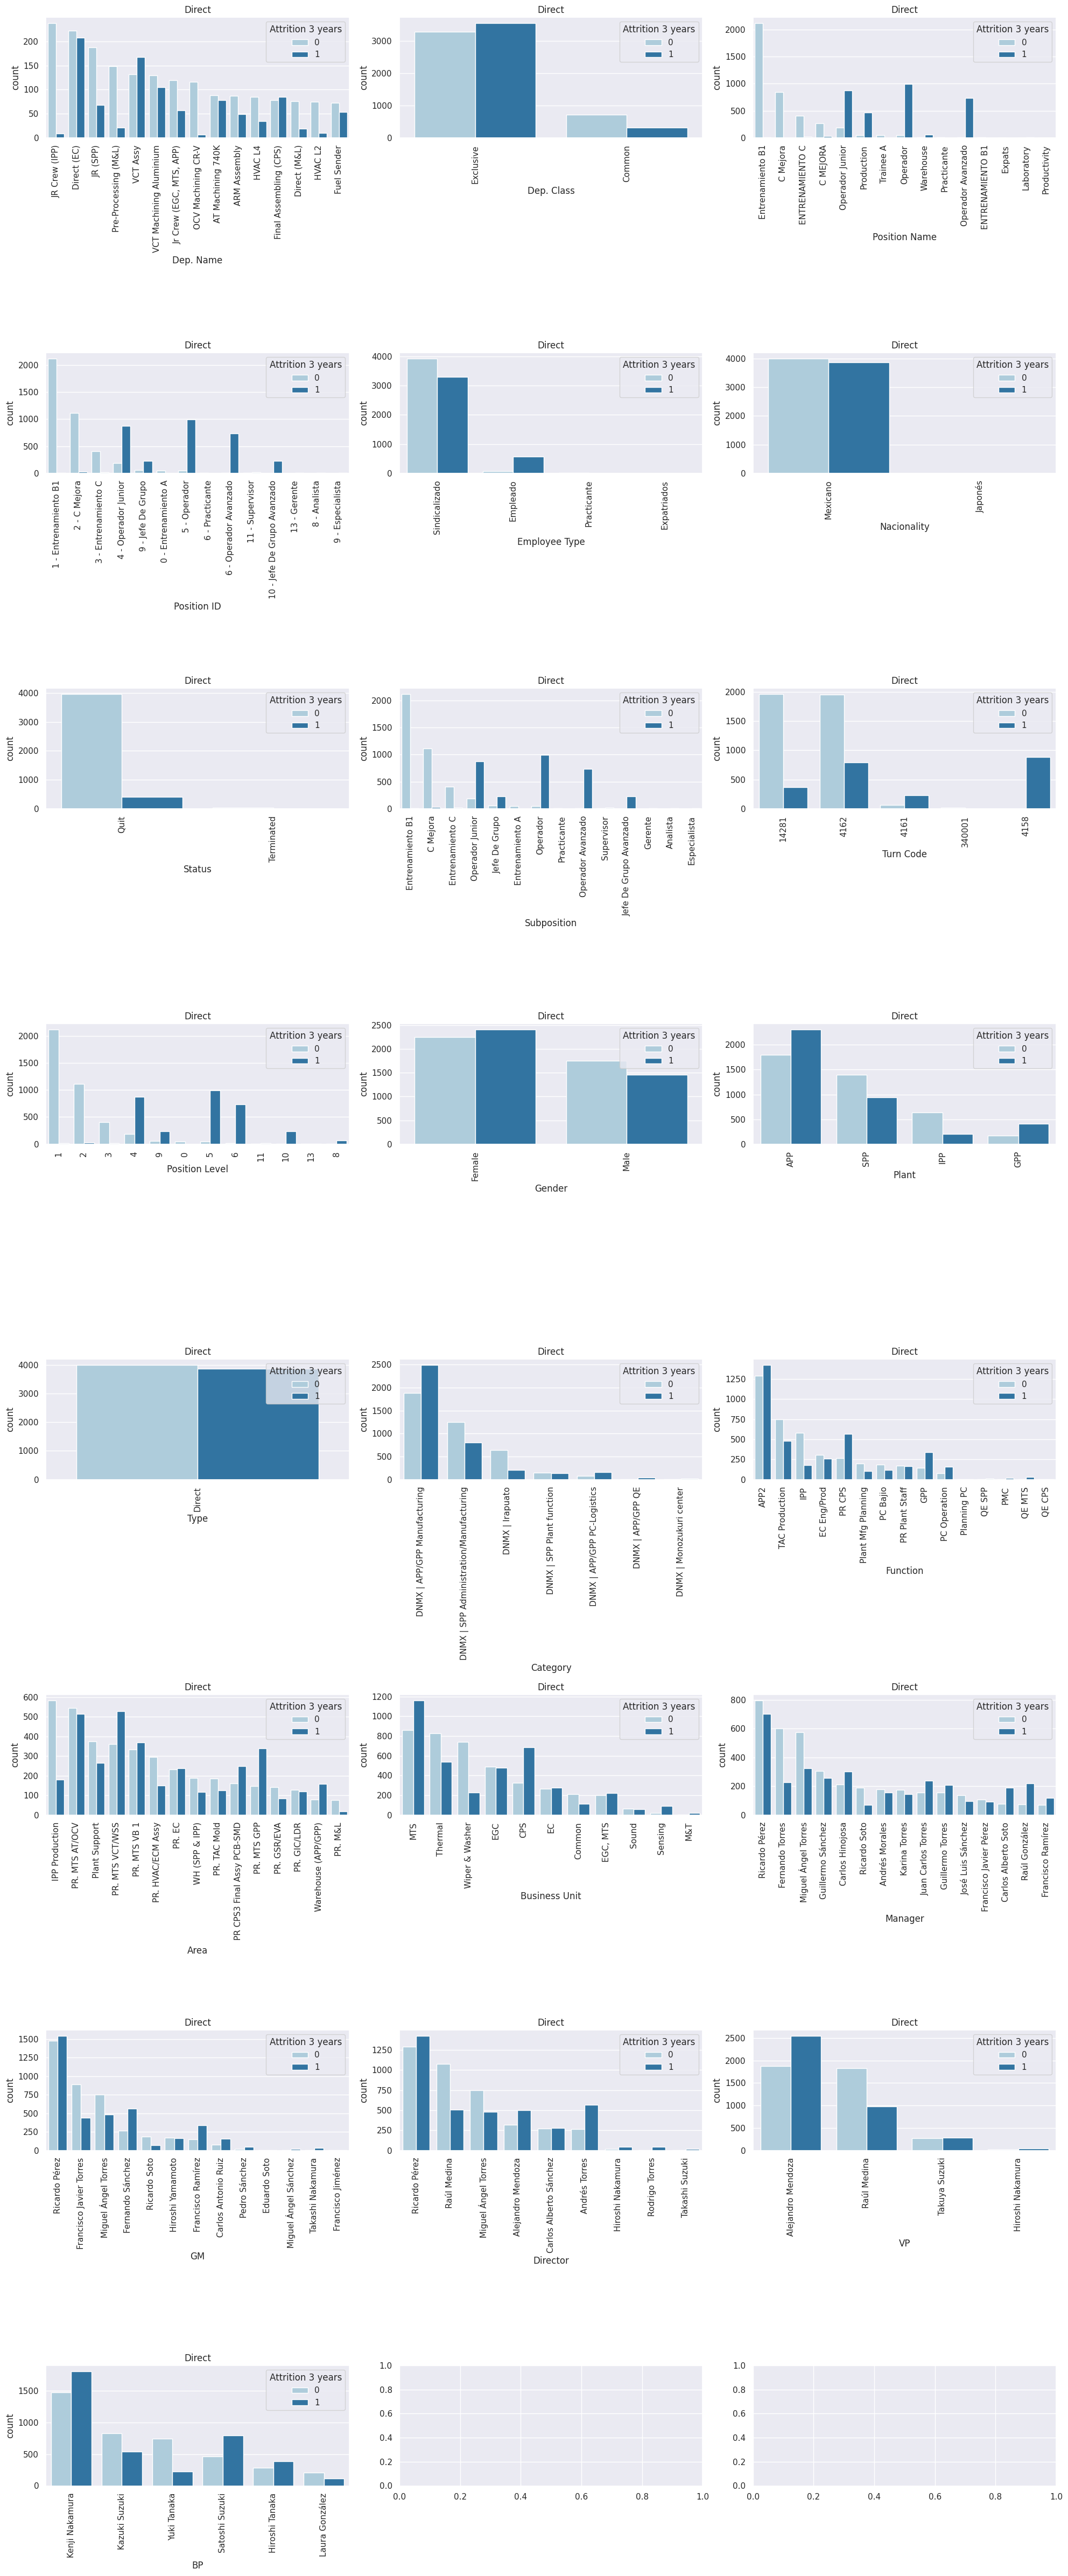

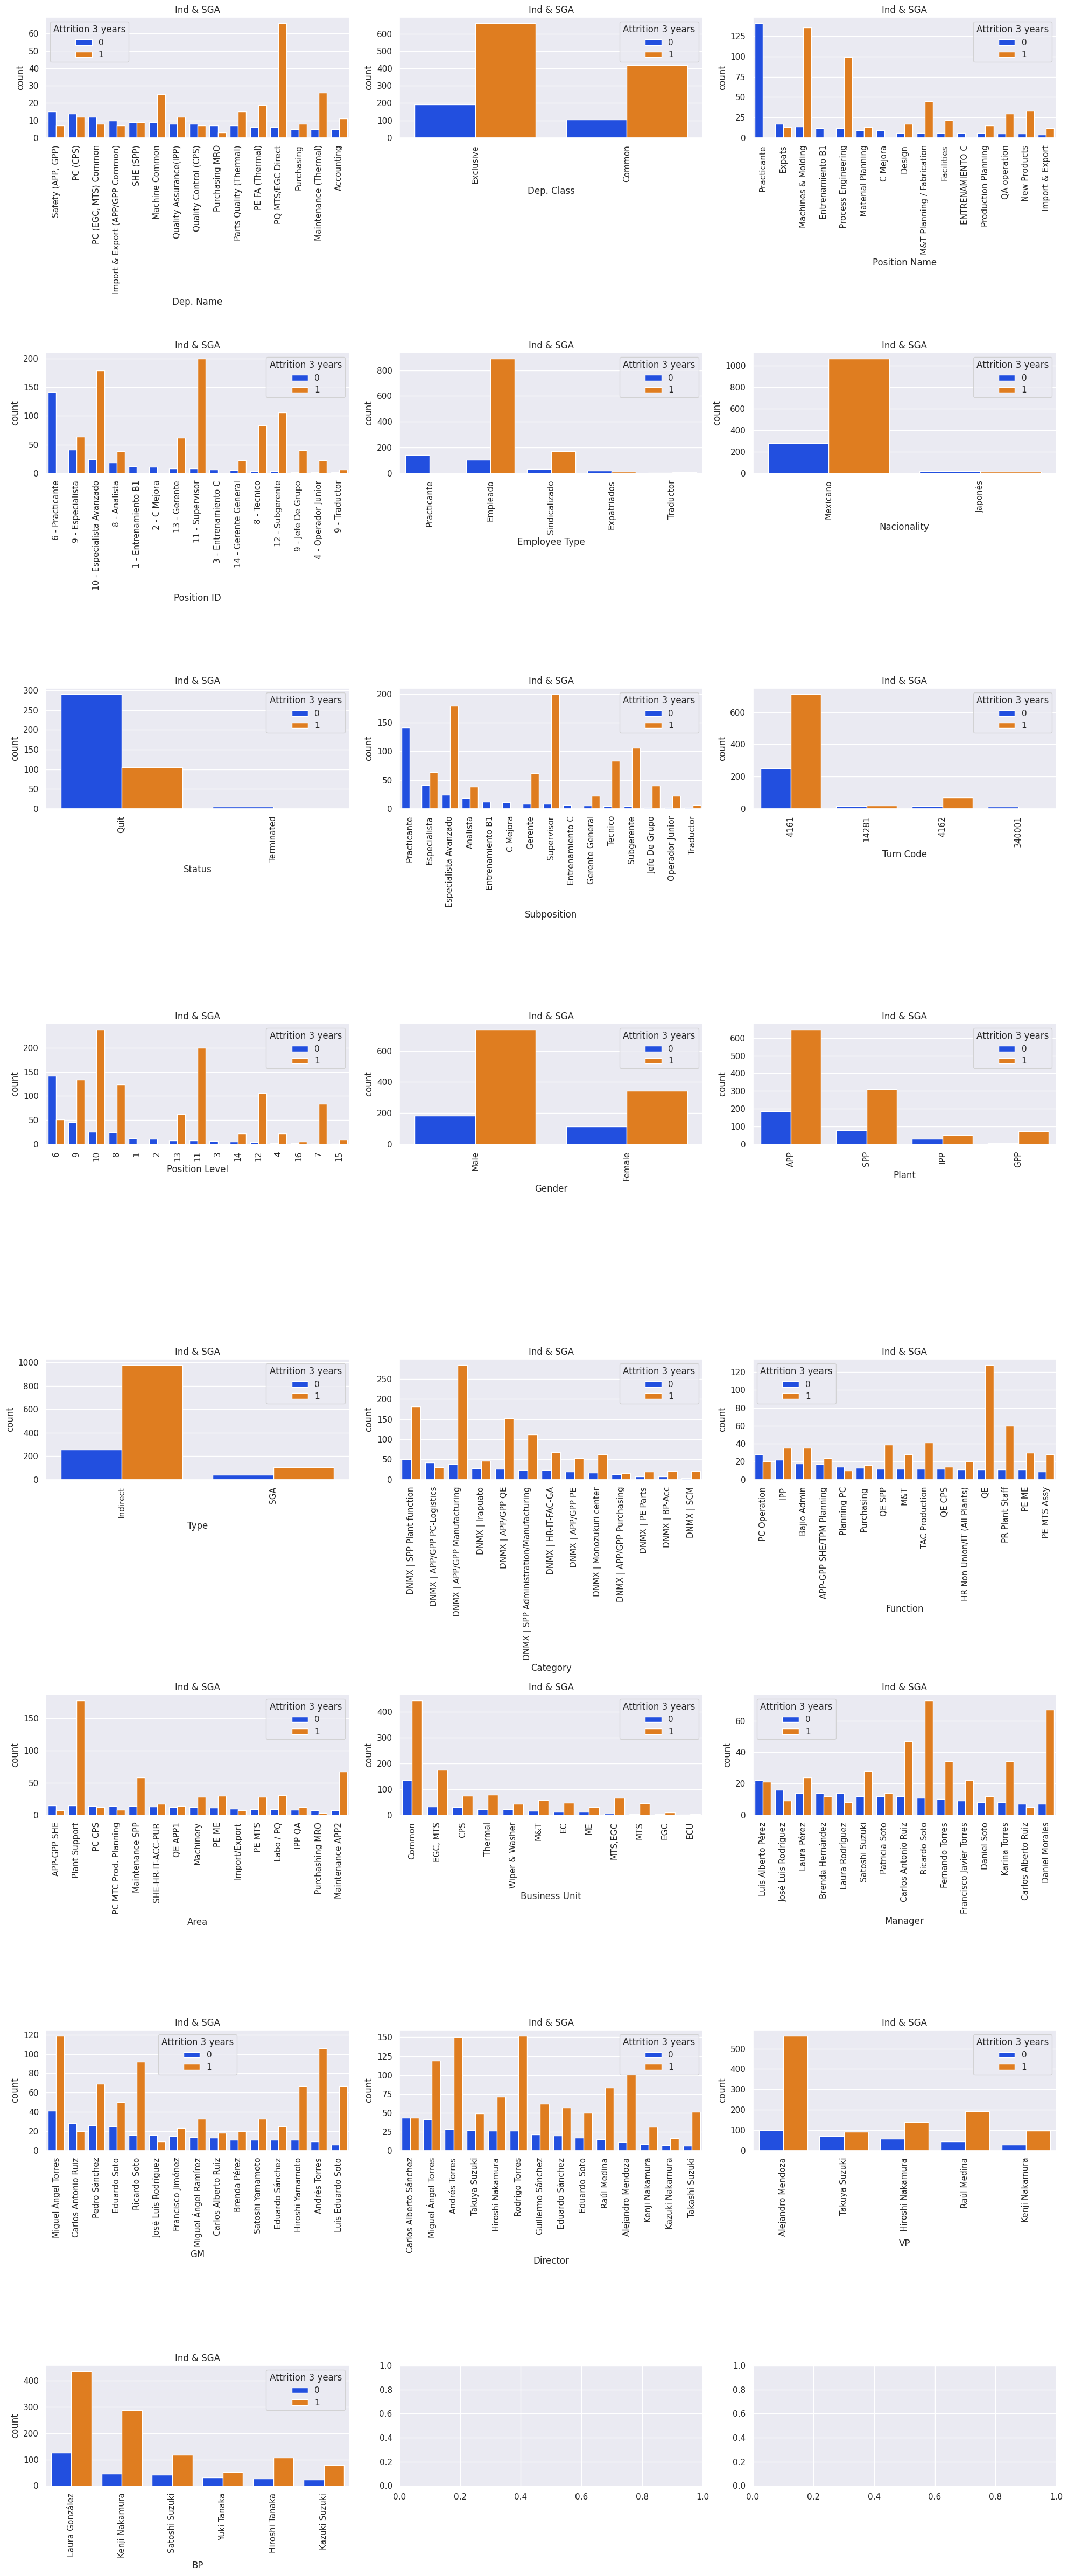

In [18]:
# Variables para filtrar y ordenar
filter_variables = [
    'Dep. Name', 'Dep. Class', 'Position Name', 'Position ID', 'Employee Type', 'Nacionality',
    'Status', 'Subposition', 'Turn Code', 'Position Level', 'Gender', 'Plant', 'Type', 'Category', 'Function',
    'Area', 'Business Unit', 'Manager', 'GM', 'Director', 'VP', 'BP'
]

# Filtrar el DataFrame para "Directos" y "Indirectos y SGA"
df_directos = df[df['Type'] == 'Direct']
df_indirectos_sga = df[df['Type'].isin(['Indirect', 'SGA'])]

# Crear figuras con subplots para Directos
num_plots = len(filter_variables)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calcular el número de filas necesario
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Directos
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_directos[df_directos['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Crear un countplot para la variable filtrada y ordenada para Directos
    sns.countplot(x=var, hue='Attrition 3 years', data=df_directos, order=sorted_categories, ax=axs[i], palette='Paired')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Direct')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Directos
plt.show()

# Crear figuras con subplots para Indirectos y SGA
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Indirectos y SGA
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_indirectos_sga[df_indirectos_sga['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Crear un countplot para la variable filtrada y ordenada para Indirectos y SGA
    sns.countplot(x=var, hue='Attrition 3 years', data=df_indirectos_sga, order=sorted_categories, ax=axs[i], palette='bright')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Ind & SGA')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Indirectos y SGA
plt.show()

Creamos histogramas para analizar como las diferentes opciones categoricas de cada variable se ven afectadas por Attrition de un ángulo diferente

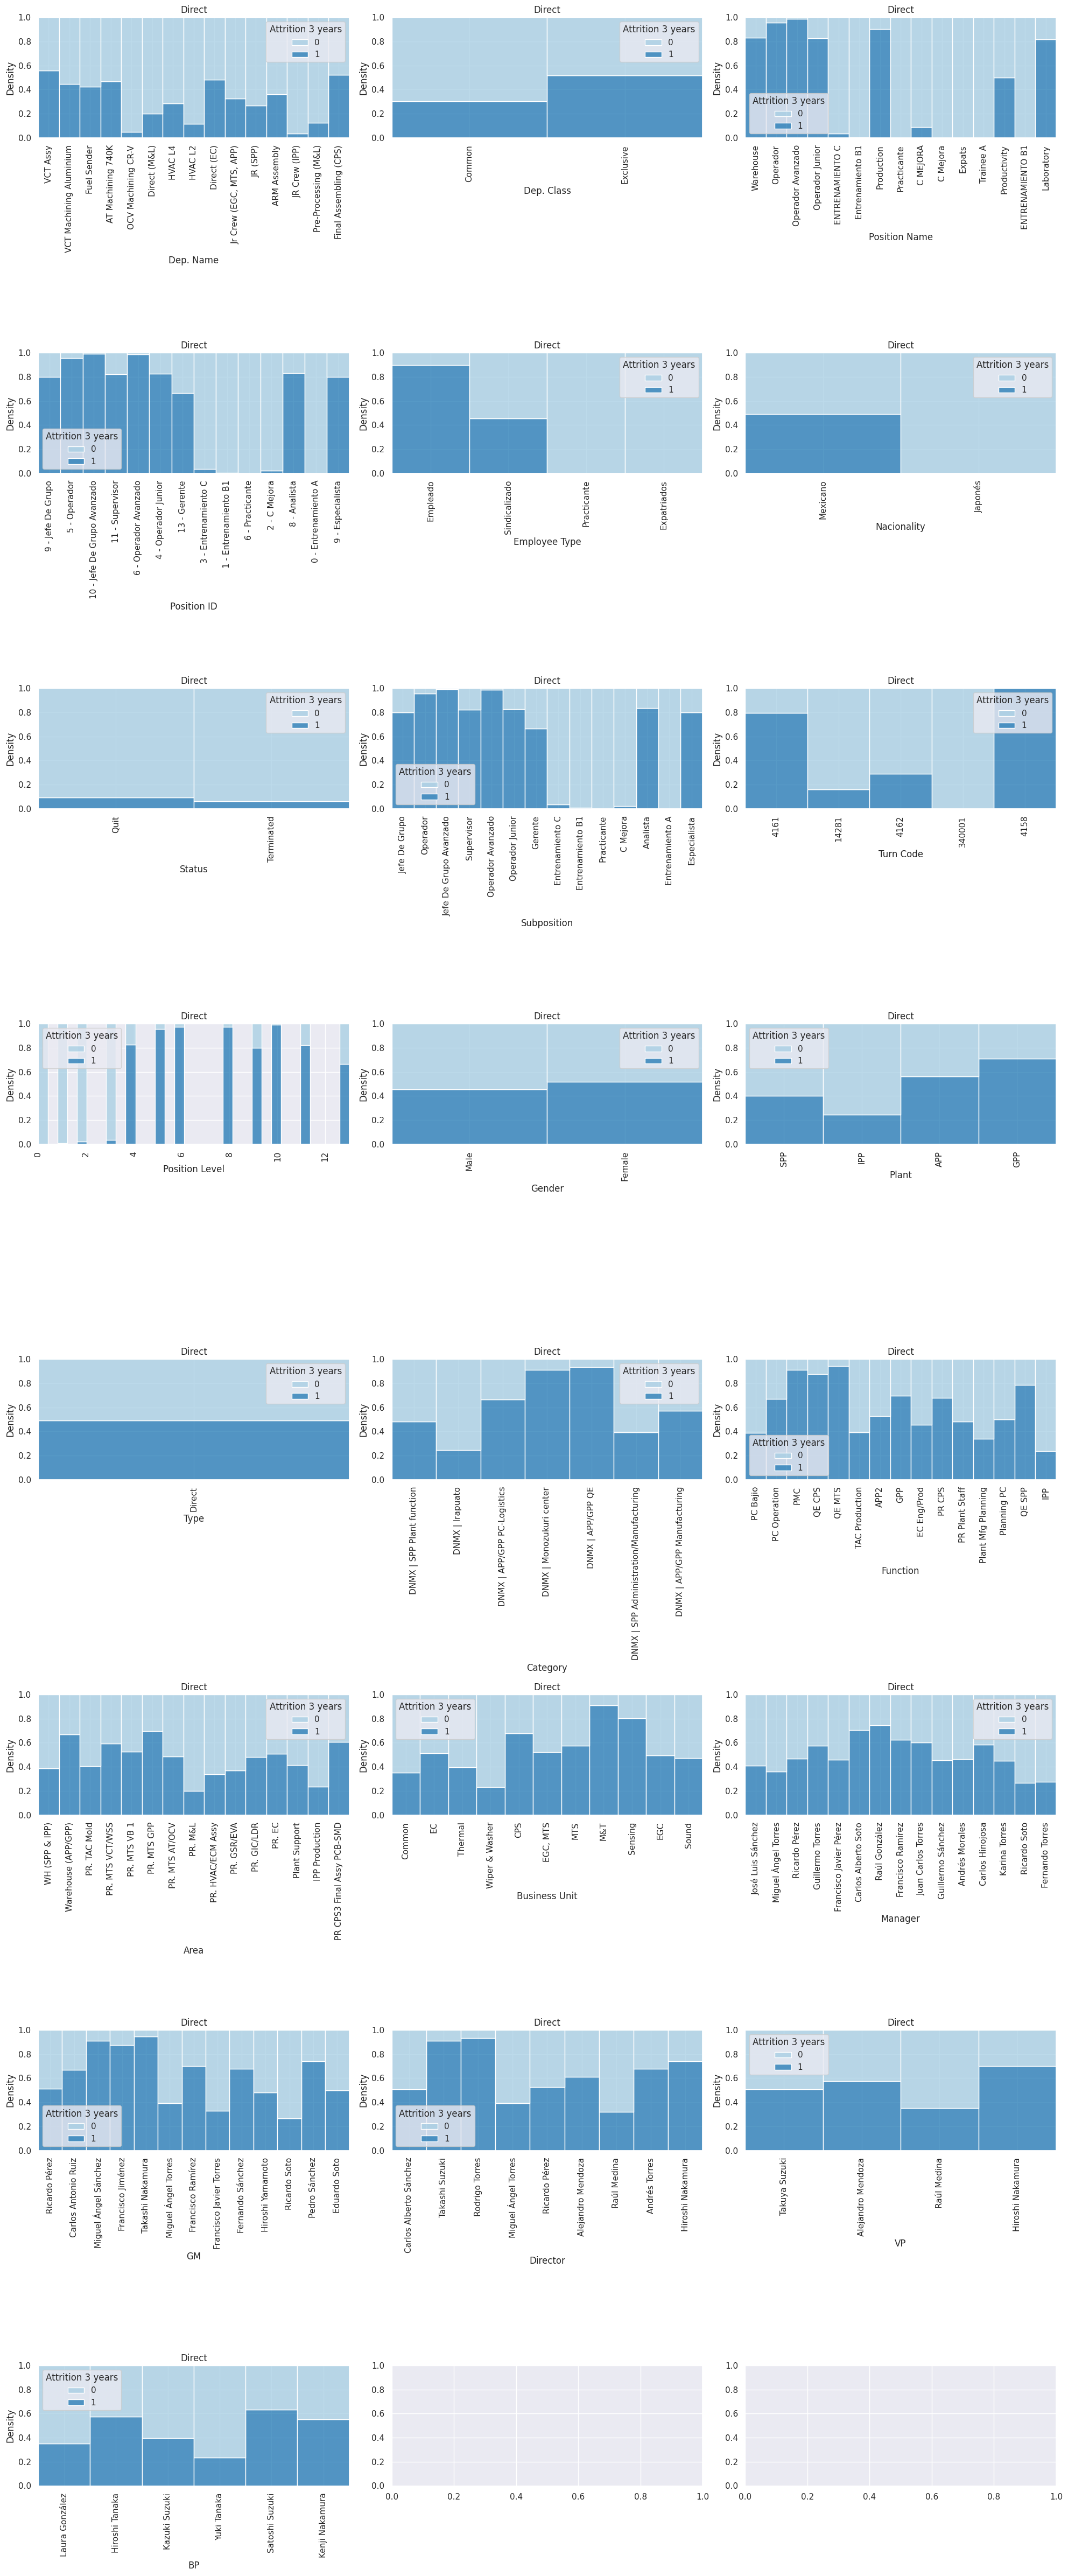

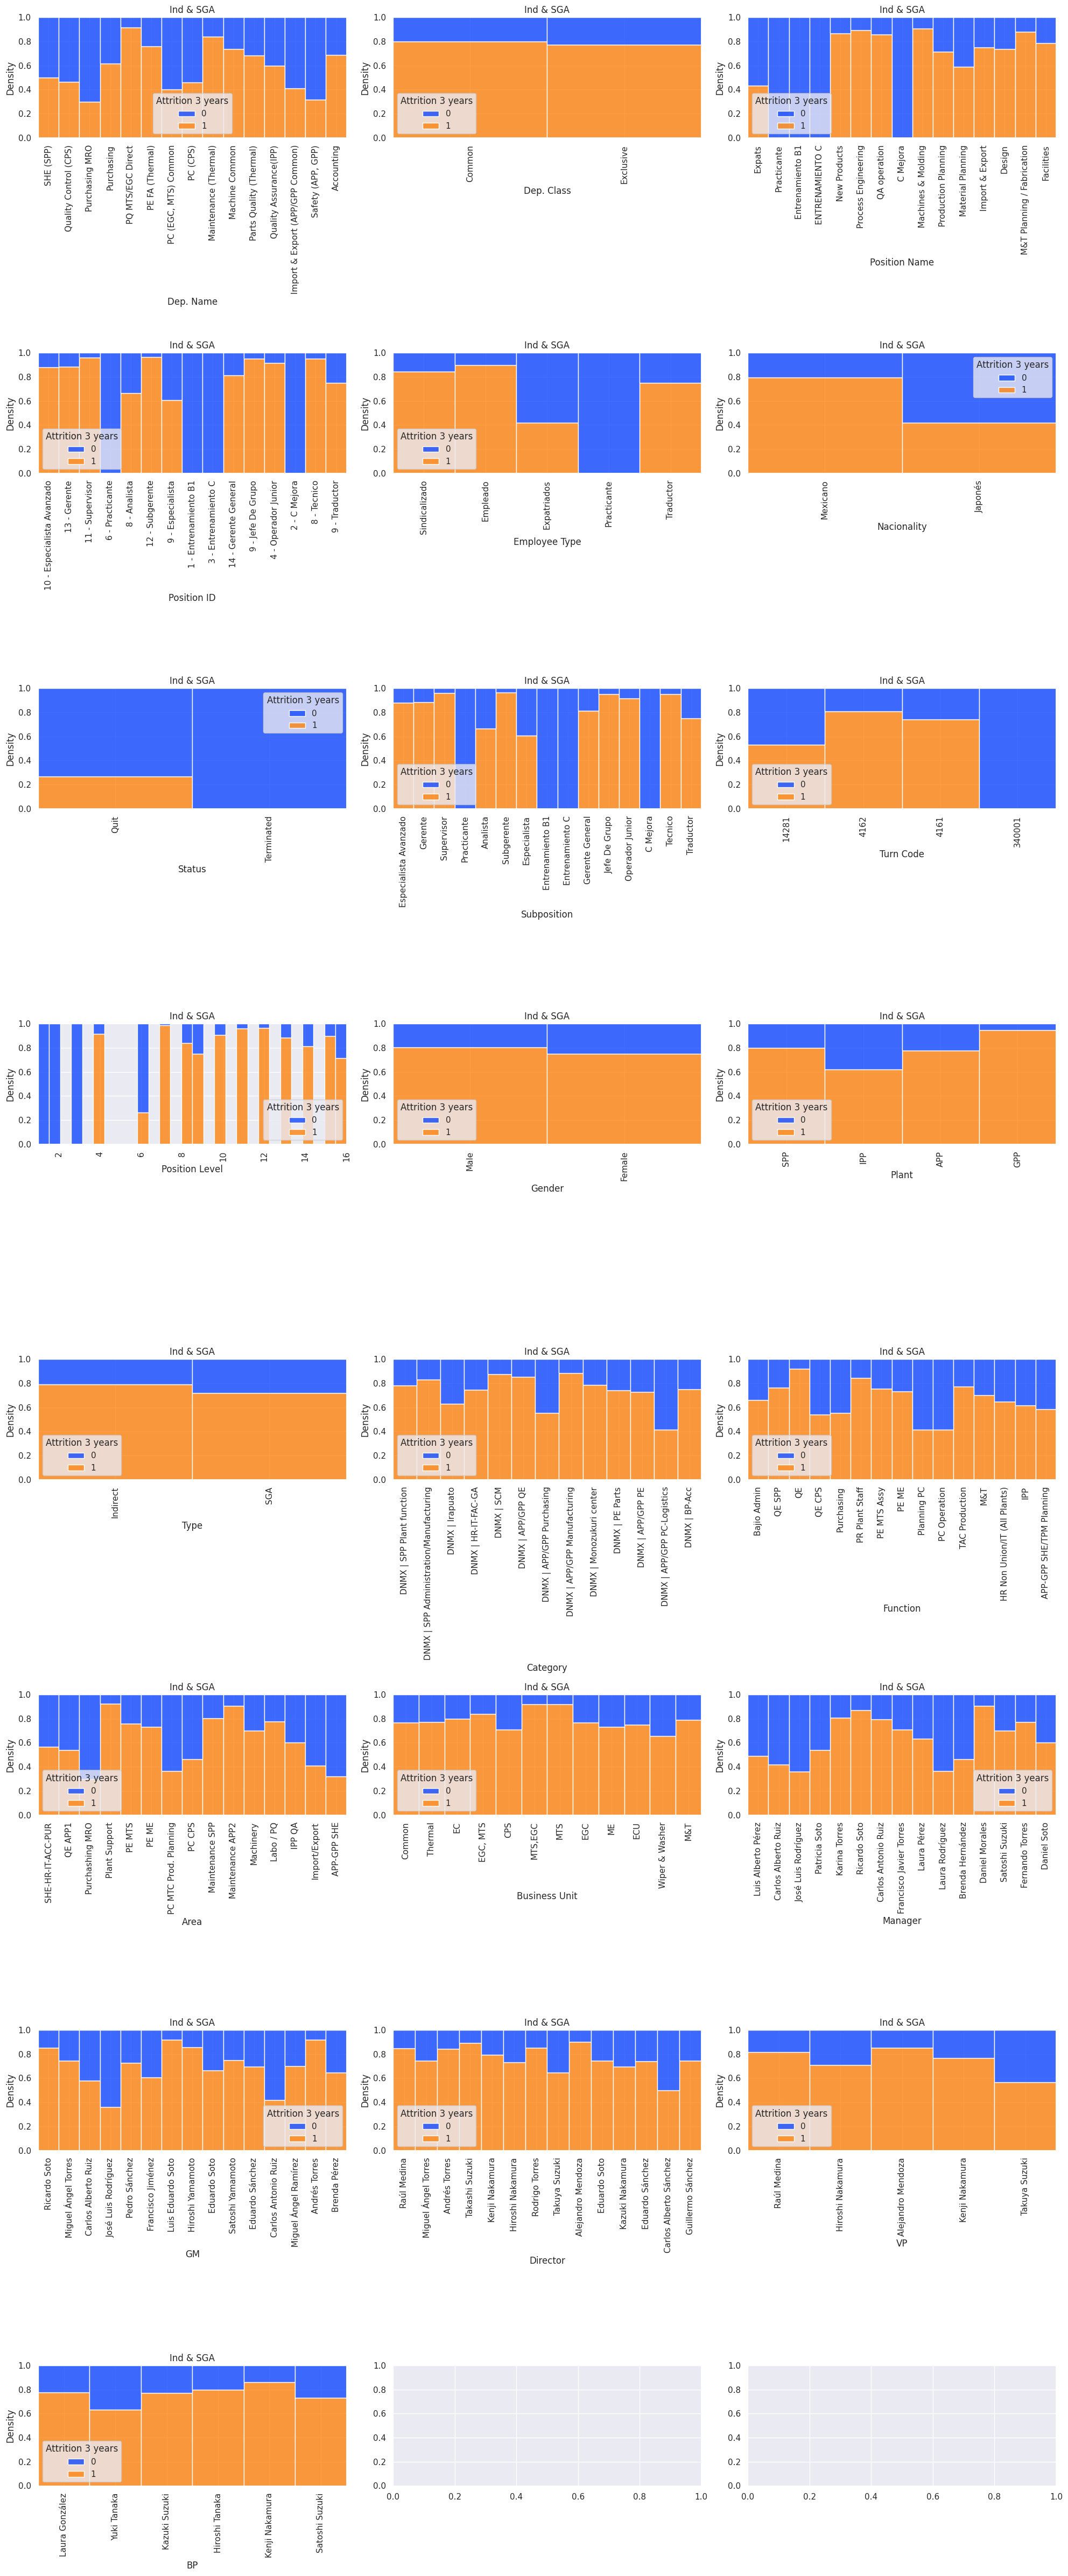

In [19]:
# Crear figuras con subplots para Directos
num_plots = len(filter_variables)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calcular el número de filas necesario
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Directos
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_directos[df_directos['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Ordenar los datos por las categorías ordenadas
    df_sorted = df_directos[df_directos[var].isin(sorted_categories)]

    # Crear un countplot para la variable filtrada y ordenada para Directos
    sns.histplot(x=var, hue='Attrition 3 years', data=df_sorted, multiple="fill", kde=False, element="bars", fill=True, stat="density", ax=axs[i], palette='Paired')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Direct')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Directos
plt.show()

# Crear figuras con subplots para Indirectos y SGA
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 6*num_rows))
axs = axs.flatten()

# Iterar sobre las variables filtradas para Indirectos y SGA
for i, var in enumerate(filter_variables):
    # Calcular la frecuencia de cada categoría donde hue=0
    category_counts = df_indirectos_sga[df_indirectos_sga['Attrition 3 years'] == 0][var].value_counts()

    # Ordenar las categorías según el recuento de ocurrencias donde hue=0 en 'Attrition 3 years'
    sorted_categories = category_counts.head(15).index

    # Ordenar los datos por las categorías ordenadas
    df_sorted = df_indirectos_sga[df_indirectos_sga[var].isin(sorted_categories)]

    # Crear un countplot para la variable filtrada y ordenada para Indirectos y SGA
    sns.histplot(x=var, hue='Attrition 3 years', data=df_sorted, multiple="fill", kde=False, element="bars", fill=True, stat="density", ax=axs[i], palette='bright')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)  # Rotar las etiquetas en 90 grados
    axs[i].set_title('Ind & SGA')

# Ajustar espacio entre subplots
fig.tight_layout()

# Mostrar el plot para Indirectos y SGA
plt.show()

Conclusiones de variables categóricas:

1. **empleados directos** tienen mucha mayor probabilidad de durar menos de 3 años a diferencia de los indirectos y SGA.
2. **empleados de plantas de Guanajuato** tienen mayor probabilidad de durar menos que los de Nuevo León
3. **empleados SGA Analistas y Especialistas** tienen mayor probabilidad de durar menos que los demás, éstos son los primeros dos puestos de entrada.
4. **empleados en categorías purchasing y PC-Logistics** tienen mayor probabilidad de durar menos que los demás.

## **Transformaciones**

In [20]:
print("Longitud de num_vars:", len(num_vars))

Longitud de num_vars: 9240


In [21]:
print("Columnas de num_vars:", num_vars.columns)

Columnas de num_vars: Index(['ID', 'Dep. No.', 'Chief ID', 'Position Level', 'Employee Type ID',
       'Hire Month Date', 'Hire Year Date', 'Resign Month Date',
       'Resign Year Date', 'Years in Company', 'Avg. Years Position',
       'Attrition 3 years', 'Target'],
      dtype='object')


In [22]:
print("Número de columnas en num_vars:", len(num_vars.columns))

Número de columnas en num_vars: 13


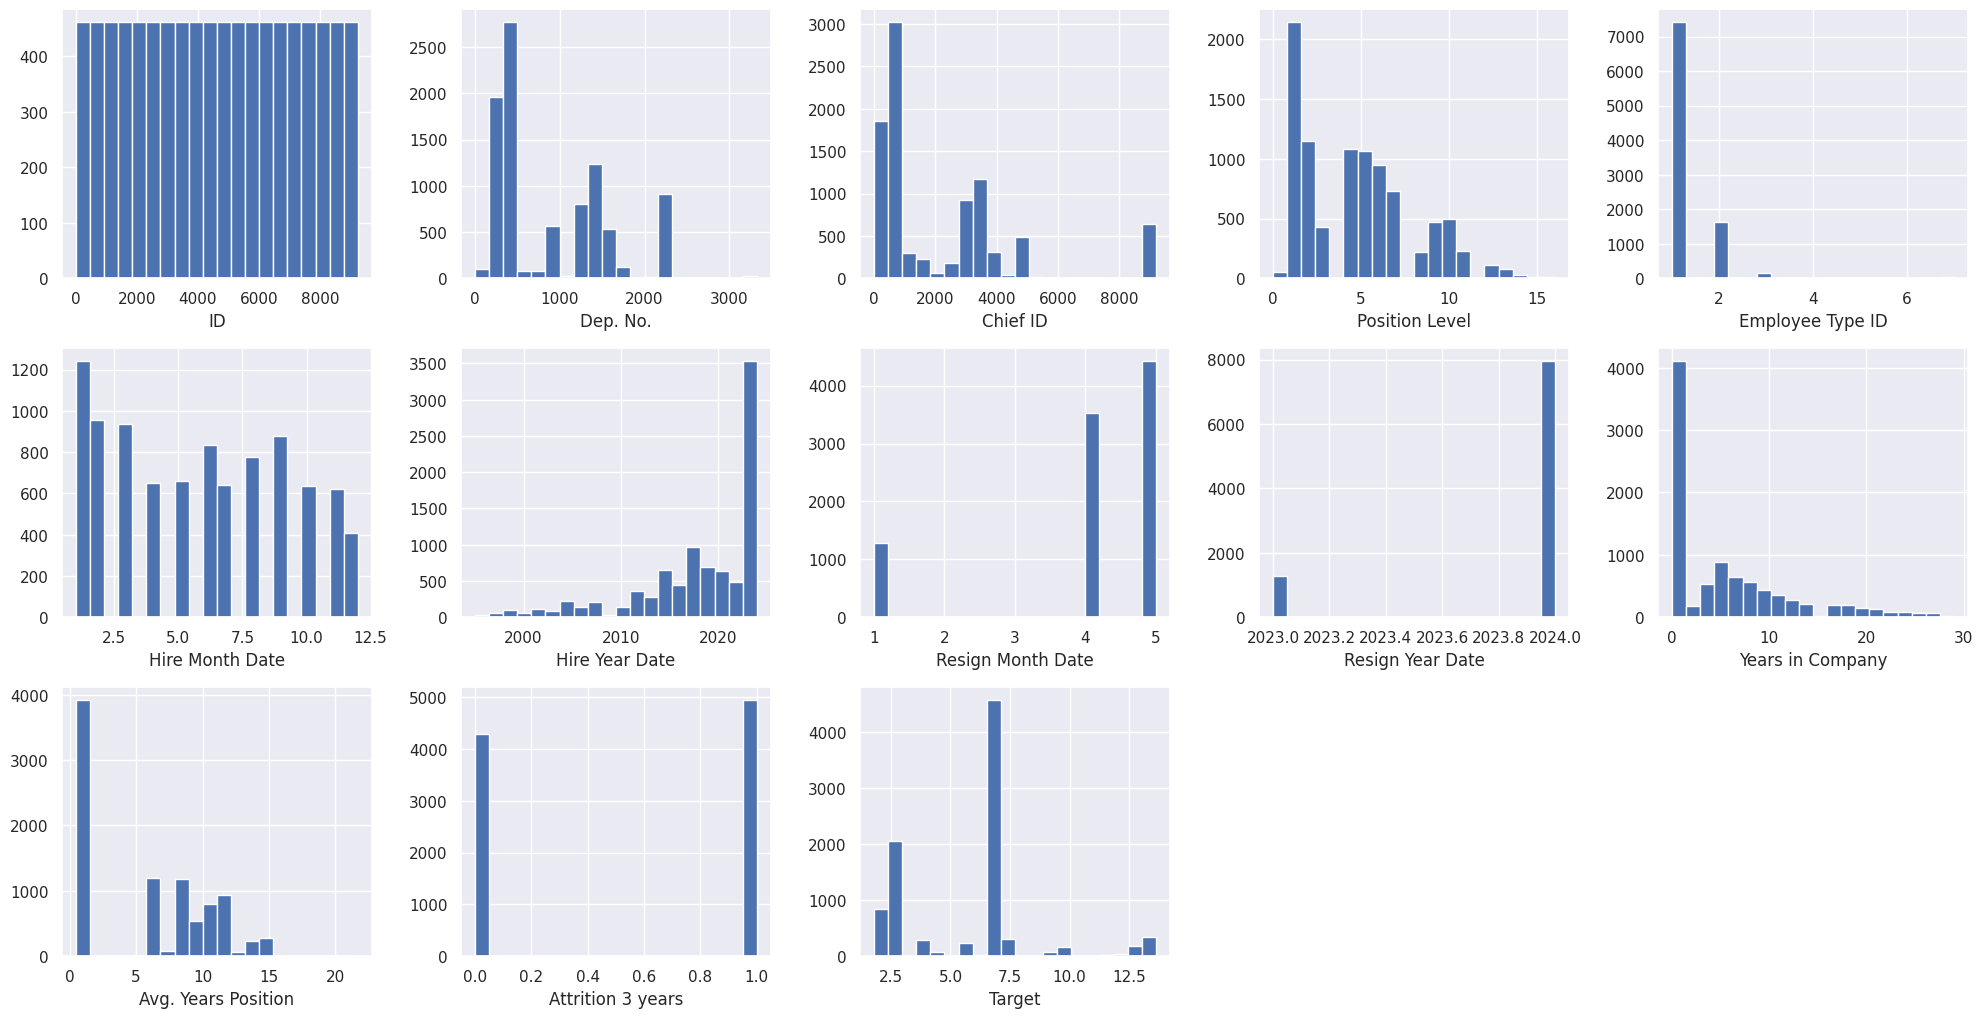

In [23]:
# Variables de entrada del conjunto de Entrenamiento:

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 20))

# Crear los histogramas para cada variable
for k, col in enumerate(num_vars.columns):
    plt.subplot(6, 5, k + 1)  # Organizar los subgráficos en una matriz de 6x5
    plt.hist(num_vars[col], bins=20)
    plt.xlabel(col)

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

No se va a realizar ninguna transformación

## **Realizamos el análisis para los datos de tipo categórico binario y aplica la transformación LabelEncoder() de sklearn a estas variables.**

In [24]:
cat_vars.nunique()

Dep. Name            284
Department           286
Dep. Class             2
Subposition           27
Position ID           27
Position Name         96
Employee Type          5
Nacionality            2
Status                 3
Turn Code             13
Gender                 2
Plant                  4
Type                   3
Type.1                 2
Category              16
Function              47
Area                  83
Business Unit         16
Manager               76
GM                    36
Director              18
VP                     6
BP                     6
mgr_spoc               4
gm_spoc                4
dir_spoc               4
vp_spoc                4
bp_spoc                4
NEW_Dep. Name         11
NEW_POSITION_2        10
NEW_Category           8
NEW_Function          11
NEW_Area              11
NEW_Business Unit     11
dtype: int64

Encontramos Dep. Class y Gender, como las dos variables categoricas binarias.

#### **Procesamiento de datos**

Utilizamos pandas.Series.unique, lo cual devuelve valores únicos de una serie de objetos.

Los valor únicos se devuelven en orden de aparición. Los valores Únicos se basan en tablas hash, por lo tanto, NO se ordenan.
https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html


Nos aseguramos de ajustar (fit) y transformar Gender y Dep. Class usando los datos de entrenamiento y luego aplicar la transformación al conjunto de prueba

In [25]:
from sklearn import preprocessing

In [26]:
# Crear el codificador de etiquetas para 'Gender'
label_encoder_gender = preprocessing.LabelEncoder()

# Ajustar el codificador solo en el conjunto de entrenamiento
label_encoder_gender.fit(Xtrain['Gender'])

# Transformar los conjuntos de entrenamiento y prueba
Xtrain['Gender'] = label_encoder_gender.transform(Xtrain['Gender'])
Xtest['Gender'] = label_encoder_gender.transform(Xtest['Gender'])

# Crear el codificador de etiquetas para 'Dep. Class'
label_encoder_dep_class = preprocessing.LabelEncoder()

# Ajustar el codificador solo en el conjunto de entrenamiento
label_encoder_dep_class.fit(Xtrain['Dep. Class'])

# Transformar los conjuntos de entrenamiento y prueba
Xtrain['Dep. Class'] = label_encoder_dep_class.transform(Xtrain['Dep. Class'])
Xtest['Dep. Class'] = label_encoder_dep_class.transform(Xtest['Dep. Class'])

# Verificar los valores únicos después de la transformación
print("Valores únicos en Gender (entrenamiento):", Xtrain['Gender'].unique())
print("Valores únicos en Gender (prueba):", Xtest['Gender'].unique())
print("Valores únicos en Dep. Class (entrenamiento):", Xtrain['Dep. Class'].unique())
print("Valores únicos en Dep. Class (prueba):", Xtest['Dep. Class'].unique())

Valores únicos en Gender (entrenamiento): [0 1]
Valores únicos en Gender (prueba): [0 1]
Valores únicos en Dep. Class (entrenamiento): [1 0]
Valores únicos en Dep. Class (prueba): [1 0]



**e) Realizamos el análisis para los datos de tipo categórico nominal y con base a ello, aplica la transformación llamada get_dummies() de Pandas a dichas variables. Usa además el argumento “drop_first” para generar “k-1” variables “dummies” a partir de los “k” niveles de cada variable nominal.**

In [27]:
cat_vars.head()

Dep. Name                            Department  \
0  Logistics (SPP, WH Expansion)  1232 - Logistics (SPP, WH Expansion)   
1  Logistics (SPP, WH Expansion)  1232 - Logistics (SPP, WH Expansion)   
2      Logistics Components (EC)      1238 - Logistics Components (EC)   
3            Logistics (Thermal)            1233 - Logistics (Thermal)   
4      Logistics Components (EC)      1238 - Logistics Components (EC)   

  Dep. Class       Subposition           Position ID     Position Name  \
0     Common   Gerente General  14 - Gerente General   General Manager   
1     Common        Subgerente       12 - Subgerente        Subgerente   
2  Exclusive          Sublider          8 - Sublider         Warehouse   
3     Common  Operador Experto  7 - Operador Experto  Operador Experto   
4  Exclusive  Operador Experto  7 - Operador Experto  Operador Experto   

   Employee Type Nacionality  Status Turn Code  Gender Plant    Type  Type.1  \
0       Empleado    Mexicano  Active      4161    Male   SPP  Direct  Direct   
1       Empleado    Mexicano    Quit      4161  Female   SPP  Direct  Direct   
2       Empleado    Mexicano  Active     14282    Male   SPP  Direct  Direct   
3  Sindicalizado    Mexicano    Quit     14283    Male   SPP  Direct  Direct   
4  Sindicalizado    Mexicano    Quit     14281    Male   SPP  Direct  Direct   

                    Category  Function            Area Business Unit  \
0  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)        Common   
1  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)        Common   
2  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)            EC   
3  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)       Thermal   
4  DNMX | SPP Plant function  PC Bajio  WH (SPP & IPP)            EC   

             Manager             GM                Director             VP  \
0  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
1  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
2  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
3  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   
4  José Luis Sánchez  Ricardo Pérez  Carlos Alberto Sánchez  Takuya Suzuki   

               BP      mgr_spoc       gm_spoc      dir_spoc       vp_spoc  \
0  Laura González  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
1  Laura González  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
2  Hiroshi Tanaka  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
3   Kazuki Suzuki  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   
4  Hiroshi Tanaka  mgr_spoc_>82  gm_spoc_>125  dir_spoc_>81  vp_spoc_>487   

         bp_spoc NEW_Dep. Name                NEW_POSITION_2  \
0   bp_spoc_<924         Other  5. Gestión y Administración:   
1   bp_spoc_<924         Other  5. Gestión y Administración:   
2   bp_spoc_<924         Other  1. Producción y Operaciones:   
3  bp_spoc_>1454         Other  1. Producción y Operaciones:   
4   bp_spoc_<924         Other  1. Producción y Operaciones:   

                NEW_Category NEW_Function NEW_Area NEW_Business Unit  
0  DNMX | SPP Plant function     PC Bajio    OTHER            Common  
1  DNMX | SPP Plant function     PC Bajio    OTHER            Common  
2  DNMX | SPP Plant function     PC Bajio    OTHER                EC  
3  DNMX | SPP Plant function     PC Bajio    OTHER           Thermal  
4  DNMX | SPP Plant function     PC Bajio    OTHER                EC

In [28]:
print(Xtrain.columns)

Index(['ID', 'Dep. No.', 'Dep. Name', 'Department', 'Dep. Class', 'Chief ID',
       'Position Level', 'Subposition', 'Position ID', 'Position Name',
       'Employee Type', 'Nacionality', 'Employee Type ID', 'Status',
       'Turn Code', 'Hire Date', 'Hire Month Date', 'Hire Year Date',
       'End Date', 'Resign Month Date', 'Resign Year Date', 'Gender',
       'Years in Company', 'Avg. Years Position', 'Plant', 'Type', 'Type.1',
       'Target', 'Category', 'Function', 'Area', 'Business Unit', 'Manager',
       'GM', 'Director', 'VP', 'BP', 'mgr_spoc', 'gm_spoc', 'dir_spoc',
       'vp_spoc', 'bp_spoc', 'NEW_Dep. Name', 'NEW_POSITION_2', 'NEW_Category',
       'NEW_Function', 'NEW_Area', 'NEW_Business Unit'],
      dtype='object')


In [29]:
print(Xtrain['Position Name'].value_counts())

Position Name
Entrenamiento B1     1675
Operador Junior       886
Operador              841
C Mejora              666
Operador Avanzado     654
                     ... 
4Plant Staff            1
4PE Manufacturing       1
5Direct Material        1
4Production             1
3Production             1
Name: count, Length: 91, dtype: int64


Nuestras variables categóricas nominales contienen muchos valores únicos por lo que la idea de hacer dummies no sería correcta, resulta en un número excesivo de columnas, por lo que consideraremos algunas alternativas:

**Agrupación de Categorías Menos Frecuentes:** Agrupa categorías menos frecuentes en una categoría común. Esto puede ayudar a reducir la dimensionalidad de tus datos y mejorar la capacidad de generalización del modelo.

**Codificación de Etiquetas (Label Encoding):** En lugar de crear dummies, puedes asignar a cada valor único de la variable un número entero único utilizando la codificación de etiquetas. Esto reduce la dimensionalidad a una sola columna por variable categórica, pero puede no ser adecuado para algoritmos de aprendizaje que asumen que las categorías son ordinales.

**Codificación de Frecuencias (Frequency Encoding):** Reemplaza cada categoría con la frecuencia de esa categoría en el conjunto de datos. Esto puede ser útil cuando la frecuencia de las categorías está relacionada con la variable objetivo.

**Codificación Target (Target Encoding):** Reemplaza cada categoría con la media o la probabilidad de la variable objetivo para esa categoría. Esto puede capturar las relaciones entre las variables categóricas y la variable objetivo, pero puede provocar sobreajuste si no se manejan adecuadamente.

**Codificación Helmert:** Este es un tipo de codificación que contrasta cada nivel de una variable categórica con el nivel anterior. Puede ser útil cuando hay un orden natural en los niveles de la variable categórica.

**Reducción de Dimensionalidad:** Aplica técnicas de reducción de dimensionalidad como PCA (Análisis de Componentes Principales) o LDA (Análisis Discriminante Lineal) si es relevante para tu problema. Estas técnicas pueden ayudar a reducir la dimensionalidad de tus datos sin perder demasiada información.

Vamos a implementar la Codificación Target (Target Encoding): Dado que queremos predecir la rotación de empleados, la codificación target es una técnica que captura la relación entre las variables categóricas y la variable objetivo (en este caso, el attrition) al reemplazar cada categoría por la tasa de attrition observada para esa categoría. Por ejemplo, podrías calcular la proporción de empleados que dejaron la empresa para cada manager, departamento, puesto, etc..., y usar esas proporciones como valores codificados para esas variables. Esto puede capturar la influencia de cada categoría en la probabilidad de attrition.

In [30]:


# Lista de variables categóricas nominales
nominal_columns = ['Dep. Name', 'Dep. Class', 'Position Name', 'Position ID',
                   'Employee Type', 'Nacionality', 'Status', 'Turn Code',
                   'Gender', 'Plant', 'Type', 'Category', 'Function',
                   'Area', 'Business Unit', 'Manager', 'GM', 'Director',
                   'VP', 'BP']

# Crear un nuevo DataFrame para almacenar las codificaciones target
encoded_df = pd.DataFrame(index=df.index)

#Importante
cara = [] #Category attrition rate

# Iterar sobre cada columna categórica nominal
for column in nominal_columns:
    # Calcular la tasa de attrition para cada categoría
    category_attrition_rate = df.groupby(column)['Attrition 3 years'].mean()
    # Reemplazar cada categoría por su tasa de attrition
    vn = df[column].map(category_attrition_rate)
    encoded_df[column + '_Encoded'] = vn
    cara.append(category_attrition_rate)

# Verificar el nuevo DataFrame
#encoded_df.head()

In [31]:
#unique nos dice cuantos datos son iguales
ar_df = np.array(encoded_df)
a= np.unique(ar_df,axis=0)

In [32]:
#Solo 1/3 de los valores totales son unicos en este procesamiento
a.shape

(3678, 20)

Dep. Name = Nominal
Dep. Class = Nominal
Position Name = Nominal
Position ID = Nominal
Employee Type: Nominal
Nacionality: Nominal
Status: Nominal
**Subposition: Ordinal**
Turn Code: Nominal
**Position Level: Ordinal**
Gender: Nominal
Plant: Nominal
Type: Nominal
Category: Nominal
Function: Nominal
Area: Nominal
Business Unit: Nominal
Manager: Nominal
GM: Nominal
Director: Nominal
VP: Nominal
BP: Nominal

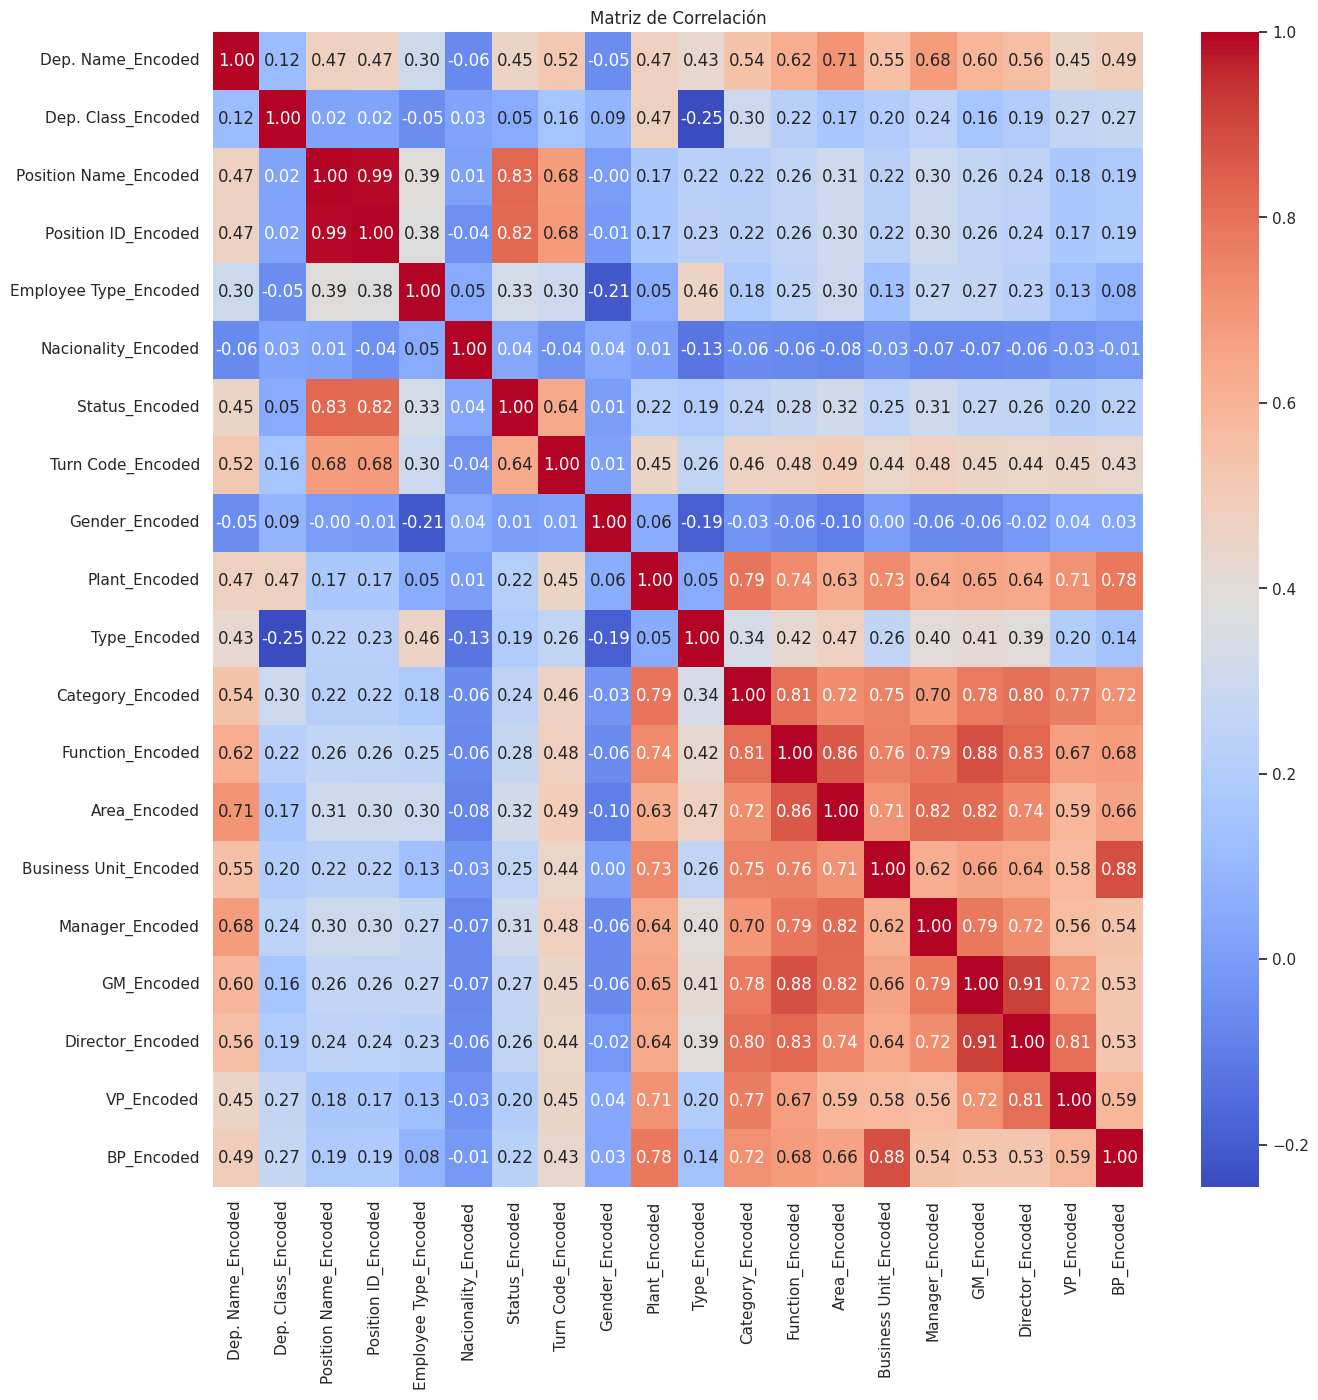

In [33]:
# Calcular la matriz de correlación entre las variables, solo tomará en cuenta las numéricas
correlation_matrix_encoded_df = encoded_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_encoded_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [34]:
X = encoded_df
y = df['Attrition 3 years']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model,Sequential
import os

In [37]:
#Nota para el lector
#los sets de datos deben estar optimizados en formato correcto para evitar colapsos de la memoria ram al momento de entrenar, en lotes es mejor

batch_size=32
buffer_size=1000

train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.batch(batch_size)

In [38]:
for x,y in train_dataset.take(1):
  print(x.shape,y.shape)

(32, 20) (32,)


In [39]:
neural_n = Sequential()
neural_n.add(Dense(32,activation="relu",input_shape=(20,),use_bias=False))
neural_n.add(Dense(16,activation="relu"))
neural_n.add(Dense(8,activation="relu"))
neural_n.add(Dropout(0.1))
neural_n.add(Dense(1,activation="sigmoid"))

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4,beta_1=0.9)
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [41]:
!mkdir -p checkpoints

In [42]:
#Una vez entrenado el modelo debemos guardar los pesos
ckpt_path = "/content/checkpoints/"
ckpt_j = os.path.join(ckpt_path,"ckpt")
ckpt = tf.train.Checkpoint(
    model=neural_n,
)

In [43]:
@tf.function() #Para que optimize el grafo de operaciones
def train_step(x,y):
  with tf.GradientTape() as tape:
    pred = neural_n(x)
    loss = loss_object(y,pred) #Calculamos el error
    grads = tape.gradient(loss,neural_n.trainable_variables) # Calculamos gradientes
  optimizer.apply_gradients(zip(grads,neural_n.trainable_variables)) #Los aplicamos
  return loss #Para metricas

In [244]:
#Añadi el condicional para que se pueda correr todo el codigo automaticamente y que cargue los pesos
trained=True
#En caso de modificar la arquitectura o querer reentrenar, poner trained=False
if not trained:
  epochs=2000
  hist = []
  for epoch in range(epochs):
    n=0
    la = 0
    print("Epoch {}/{}".format(epoch+1,epochs))
    for x,y in train_dataset:
      la += train_step(x,y)
      n+=1
      print(".",end="")
      if n%100==0:
        print("")
    hist.append(la/n)
    print("Loss {}".format(hist[-1]))

  plt.title("Error con {} pasos".format(epochs))
  plt.plot(hist)
else:
    ckpt.restore(tf.train.latest_checkpoint(ckpt_path))


In [245]:
neural_n.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1313 (5.13 KB)
Trainable params: 1313 (5.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Accuracy Train**

In [246]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score

In [247]:
y_pred_neuronal = neural_n.predict(X_train).reshape(-1).round()
print('F-1 Score : {:.4f}% '.format(f1_score(y_train, y_pred_neuronal, average='micro')*100))
print('Precision |Score : {:.4f}% '.format(precision_score(y_train, y_pred_neuronal, average='micro')*100))
print('Recall Score : {:.4f}% '.format(recall_score(y_train, y_pred_neuronal, average='micro')*100))
print('Jaccard Score : {:.4f}% '.format(jaccard_score(y_train, y_pred_neuronal, average='micro')*100))

231/231 [==============================] - 1s 4ms/step
F-1 Score : 98.4172% 
Precision |Score : 98.4172% 
Recall Score : 98.4172% 
Jaccard Score : 96.8837% 


**Accuracy Test**

In [248]:
y_pred_neuronal = neural_n.predict(X_test).reshape(-1).round()
print('F-1 Score : {:.4f}% '.format(f1_score(y_test, y_pred_neuronal, average='micro')*100))
print('Precision Score : {:.4f}% '.format(precision_score(y_test, y_pred_neuronal, average='micro')*100))
print('Recall Score : {:.4f}% '.format(recall_score(y_test, y_pred_neuronal, average='micro')*100))
print('Jaccard Score : {:.4f}% '.format(jaccard_score(y_test, y_pred_neuronal, average='micro')*100))

58/58 [==============================] - 0s 2ms/step
F-1 Score : 98.1061% 
Precision Score : 98.1061% 
Recall Score : 98.1061% 
Jaccard Score : 96.2825% 


# **Instanciar el modelo (Decision tree gini)** Carlos

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
#Hacemos predicción con CLF Gini
y_pred_gini = clf_gini.predict(X_test)

In [51]:
#Estimamos precisión
print('Precisión en el set de Entrenamiento: {:.4f}%'
     .format(clf_gini.score(X_train, y_train)*100))
print('Precisión en el set de Test: {:.4f}%'
     .format(clf_gini.score(X_test, y_test)*100))

Precisión en el set de Entrenamiento: 97.2944%
Precisión en el set de Test: 97.1861%


# **Metricas de desempeño**
Accurracy score con criterio Gini Index

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : {:.4f}% '.format(f1_score(y_test, y_pred_gini, average='micro')*100))
print('Precision Score : {:.4f}% '.format(precision_score(y_test, y_pred_gini, average='micro')*100))
print('Recall Score : {:.4f}% '.format(recall_score(y_test, y_pred_gini, average='micro')*100))
print('Jaccard Score : {:.4f}% '.format(jaccard_score(y_test, y_pred_gini, average='micro')*100))

F-1 Score : 97.1861% 
Precision Score : 97.1861% 
Recall Score : 97.1861% 
Jaccard Score : 94.5263% 


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       915
           1       1.00      0.95      0.97       933

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848



<Figure size 900x900 with 0 Axes>

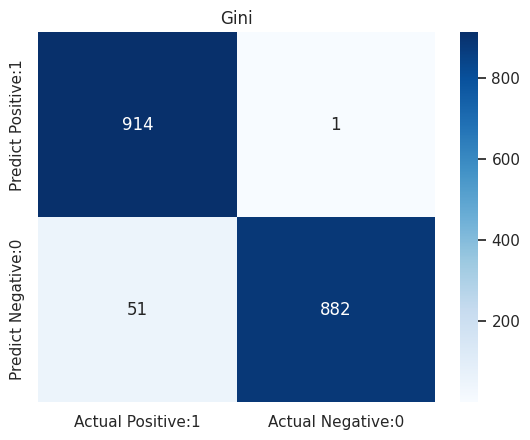

<Figure size 900x900 with 0 Axes>

In [54]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Gini')
plt.figure(figsize=(9,9))

[Text(0.5555555555555556, 0.875, 'x[2] <= 0.453\ngini = 0.496\nsamples = 7392\nvalue = [3380, 4012]'),
 Text(0.3333333333333333, 0.625, 'x[6] <= 0.554\ngini = 0.031\nsamples = 3109\nvalue = [3060, 49]'),
 Text(0.2222222222222222, 0.375, 'x[7] <= 0.876\ngini = 0.012\nsamples = 3079\nvalue = [3060, 19]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.009\nsamples = 3074\nvalue = [3060, 14]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.7777777777777778, 0.625, 'x[6] <= 0.554\ngini = 0.138\nsamples = 4283\nvalue = [320, 3963]'),
 Text(0.6666666666666666, 0.375, 'x[7] <= 0.876\ngini = 0.494\nsamples = 717\nvalue = [320, 397]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.465\nsamples = 506\nvalue = [320, 186]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 211\nvalue = [0, 211]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 3566\nvalue = [0, 3566]')]

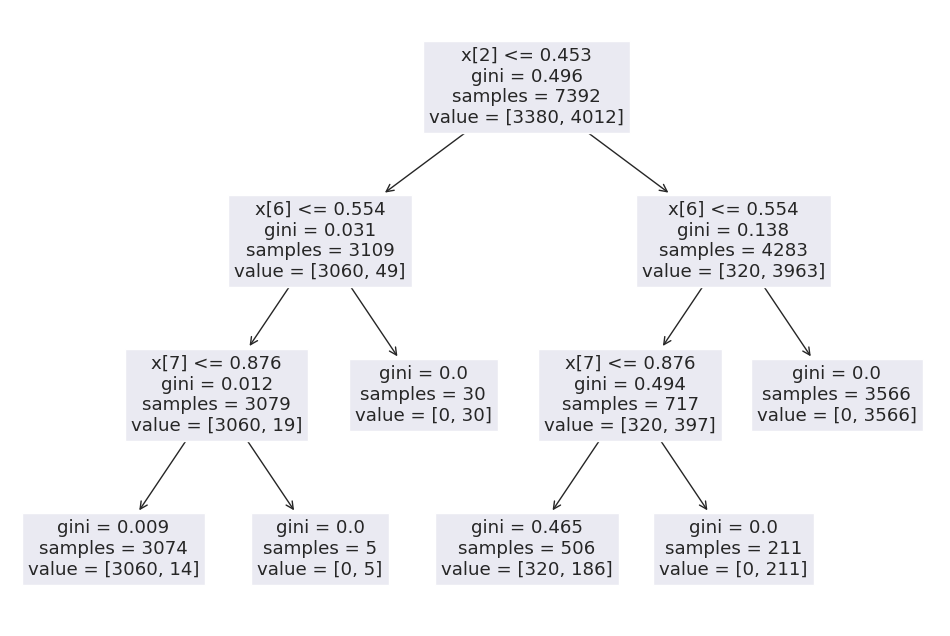

In [55]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Visualizar el árbol con graphviz**

In [56]:
#Instalar Graphviz en Python pip install graphviz
import graphviz
import pydotplus
%matplotlib inline

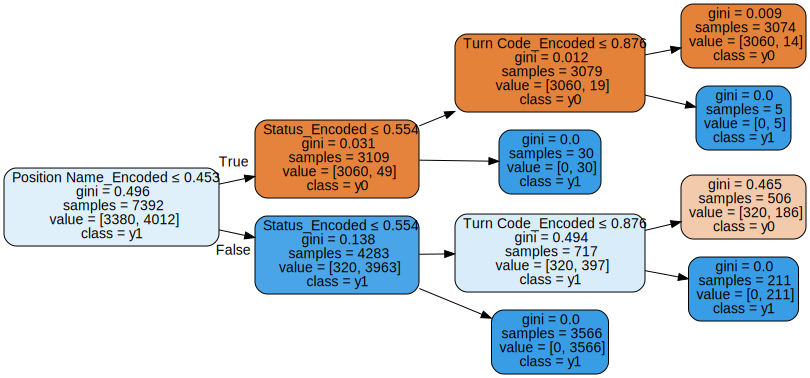

In [57]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

# **Instanciar el modelo (Decision tree entropy)** Carlos

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# **Predecir con test set para el criterio entropy**

In [59]:
y_pred_en = clf_en.predict(X_test)

In [60]:
print('Precisión en el set de Entrenamiento: {:.4f}%'.format(clf_en.score(X_train, y_train)*100))
print('Precisión en el set de Test: {:.4f}%'.format(clf_en.score(X_test, y_test)*100))

Precisión en el set de Entrenamiento: 97.2944%
Precisión en el set de Test: 97.1861%


Accuracy score con criterio Entropy

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : {:.4f}% '.format(f1_score(y_test, y_pred_gini, average='micro')*100))
print('Precision Score : {:.4f}% '.format(precision_score(y_test, y_pred_gini, average='micro')*100))
print('Recall Score : {:.4f}% '.format(recall_score(y_test, y_pred_gini, average='micro')*100))
print('Jaccard Score : {:.4f}% '.format(jaccard_score(y_test, y_pred_gini, average='micro')*100))

F-1 Score : 97.1861% 
Precision Score : 97.1861% 
Recall Score : 97.1861% 
Jaccard Score : 94.5263% 


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       915
           1       1.00      0.95      0.97       933

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848



<Figure size 900x900 with 0 Axes>

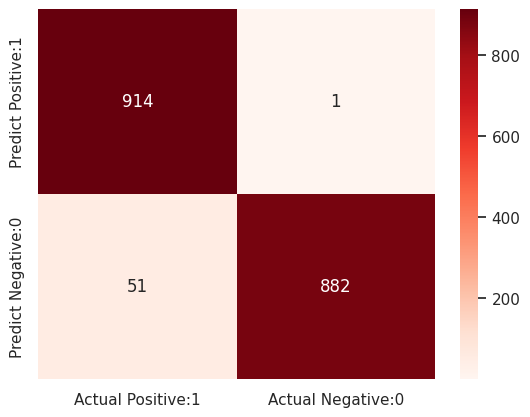

<Figure size 900x900 with 0 Axes>

In [63]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

[Text(0.625, 0.875, 'x[6] <= 0.554\nentropy = 0.995\nsamples = 7392\nvalue = [3380, 4012]'),
 Text(0.5, 0.625, 'x[3] <= 0.657\nentropy = 0.499\nsamples = 3796\nvalue = [3380, 416]'),
 Text(0.25, 0.375, 'x[7] <= 0.876\nentropy = 0.047\nsamples = 3093\nvalue = [3077, 16]'),
 Text(0.125, 0.125, 'entropy = 0.034\nsamples = 3088\nvalue = [3077, 11]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.375, 'x[7] <= 0.876\nentropy = 0.986\nsamples = 703\nvalue = [303, 400]'),
 Text(0.625, 0.125, 'entropy = 0.961\nsamples = 492\nvalue = [303, 189]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 211\nvalue = [0, 211]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 3596\nvalue = [0, 3596]')]

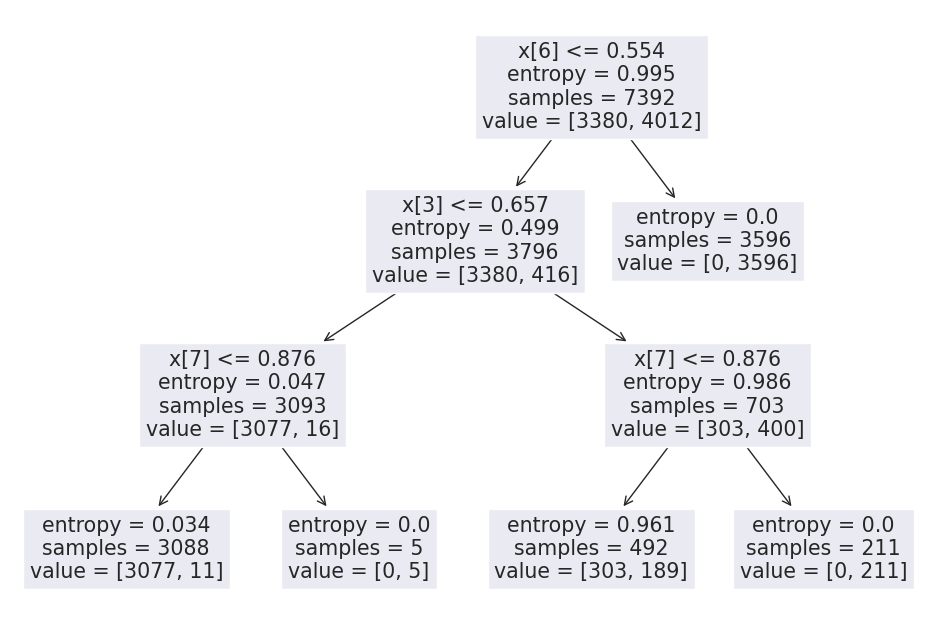

In [64]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Visualizar el árbol con graphviz**

In [65]:
#Instalar Graphviz en Python pip install graphviz
import graphviz
import pydotplus
%matplotlib inline

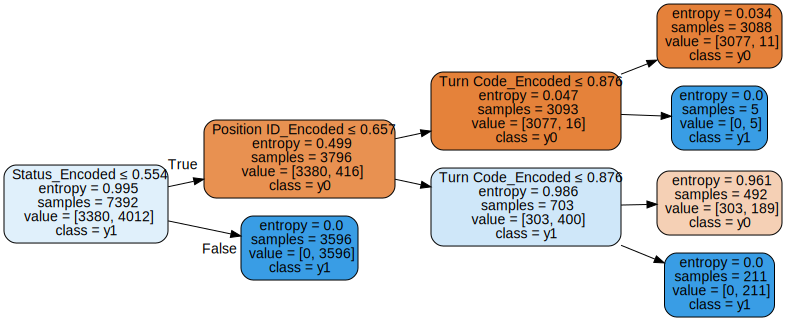

In [66]:
dot_data = tree.export_graphviz(clf_en, out_file=None, max_depth=None,
                                feature_names=X_train.columns,
                                class_names=True,
                                filled=True, rotate=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

# **El modelo funciona bien tanto con el criterio Gini como Entropy, pero predice mejor con Gini.**

# **Detectar importancia de las variables**:


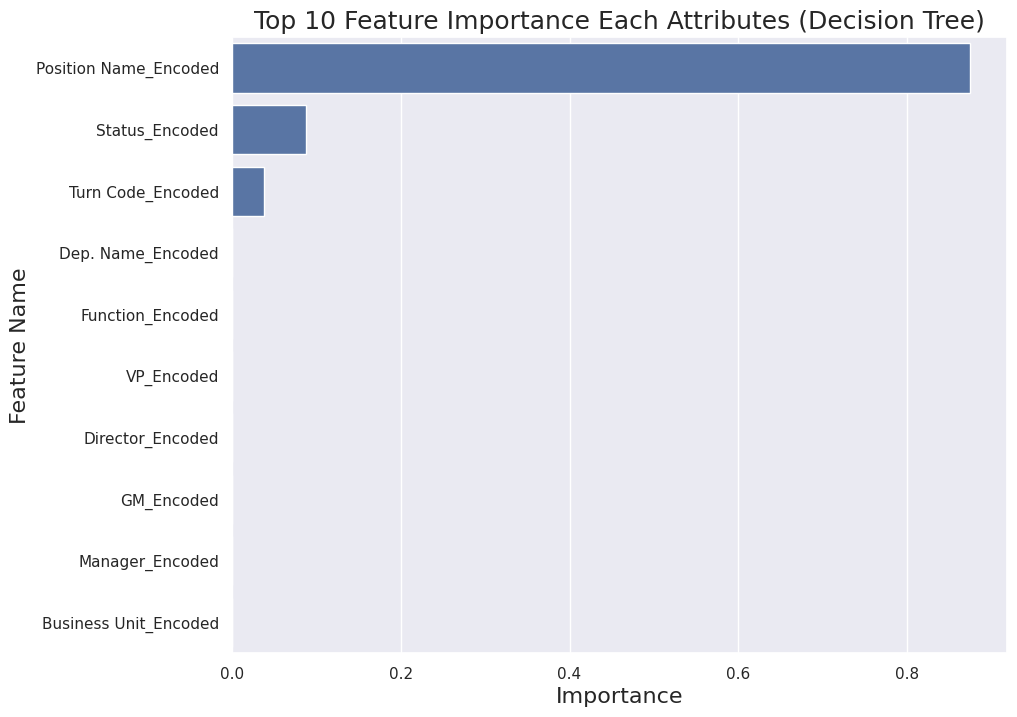

In [67]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": clf_gini.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [68]:
#Checamos con el siguiente código que estas sean las mejores características:
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k=3)
X_new = best.fit_transform(X_train , y_train)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Position Name_Encoded', 'Position ID_Encoded', 'Status_Encoded'], dtype='object')


# **RANDOM FOREST**
# **Instanciar el modelo**

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# **Función predicción Test set**

In [71]:
y_pred = rfc.predict(X_test)

In [72]:
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(rfc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(rfc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.9950
Precisión en el set de Test: 0.9756


In [73]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : {:.4f}% '.format(f1_score(y_test, y_pred_gini, average='micro')*100))
print('Precision Score : {:.4f}% '.format(precision_score(y_test, y_pred_gini, average='micro')*100))
print('Recall Score : {:.4f}% '.format(recall_score(y_test, y_pred_gini, average='micro')*100))
print('Jaccard Score : {:.4f}% '.format(jaccard_score(y_test, y_pred_gini, average='micro')*100))

F-1 Score : 97.1861% 
Precision Score : 97.1861% 
Recall Score : 97.1861% 
Jaccard Score : 94.5263% 


# **Modelo Random Forest con n_estimators = 100**

In [74]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Se fija el modelo al training set

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [75]:
#Prediccoón con test set
y_pred_100 = rfc_100.predict(X_test)

In [76]:
#Verificamos precisión del modelo
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9756


In [77]:
#Verificamos precisión del modelo
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(rfc_100.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(rfc_100.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.9950
Precisión en el set de Test: 0.9756


In [78]:
print('F-1 Score : ',(f1_score(y_test, y_pred_100, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_100, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_100, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred_100, average='micro')))

F-1 Score :  0.9756493506493507
Precision Score :  0.9756493506493507
Recall Score :  0.9756493506493507
Jaccard Score :  0.9524564183835182


In [79]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       915
           1       0.98      0.97      0.98       933

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



<Figure size 900x900 with 0 Axes>

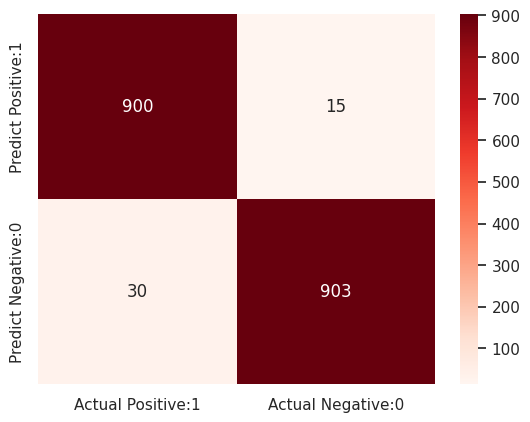

<Figure size 900x900 with 0 Axes>

In [80]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_100)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

# **Encontrar las características importantes para el modelo Random Forest**

In [81]:
# Se crea un clasificador con n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)


# Se ajusta el modelo al training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [82]:
#Score más importantes de las características del modelo
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Position Name_Encoded    0.347543
Status_Encoded           0.246912
Position ID_Encoded      0.218441
Turn Code_Encoded        0.088078
Dep. Name_Encoded        0.031014
Employee Type_Encoded    0.014615
Area_Encoded             0.012071
Manager_Encoded          0.008789
Function_Encoded         0.006627
Gender_Encoded           0.004313
Business Unit_Encoded    0.003925
GM_Encoded               0.003759
Director_Encoded         0.002909
BP_Encoded               0.002704
Category_Encoded         0.002174
Type_Encoded             0.001843
VP_Encoded               0.001467
Plant_Encoded            0.001299
Dep. Class_Encoded       0.000989
Nacionality_Encoded      0.000528
dtype: float64

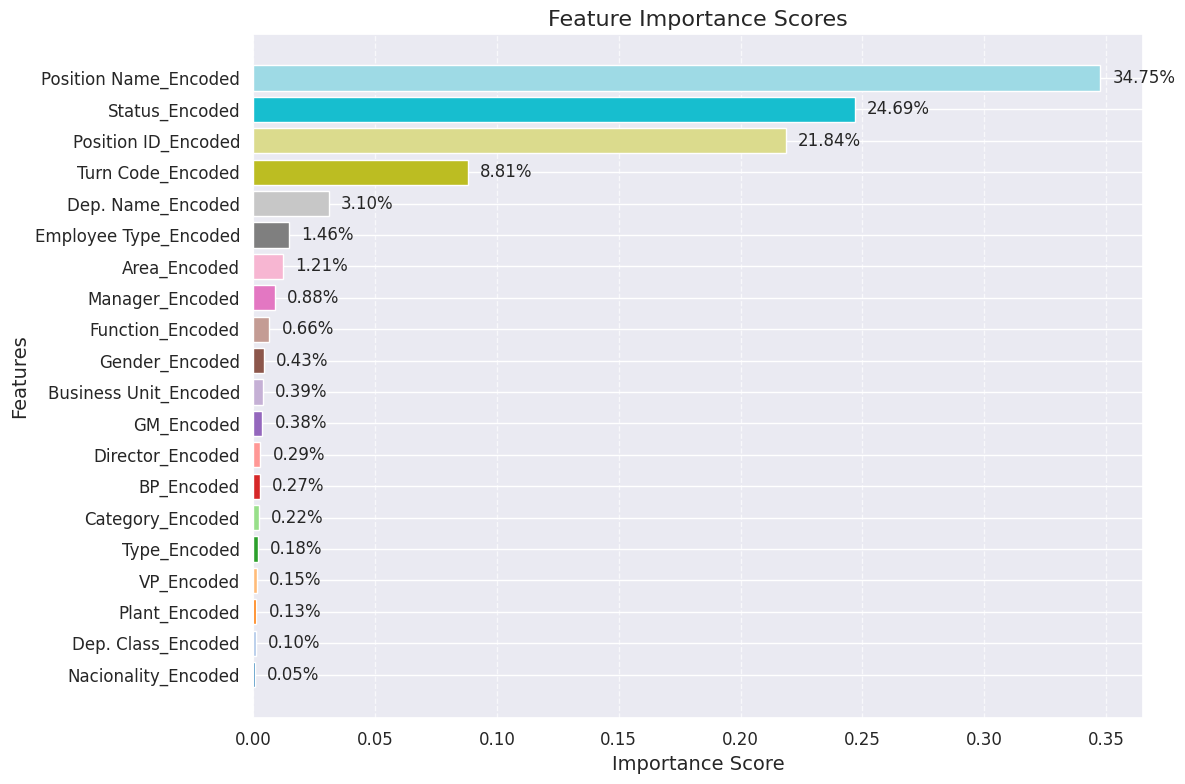

In [83]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_scores.sort_values(ascending=True).index, feature_scores.sort_values(ascending=True), color=plt.cm.tab20.colors)

# Añadir los porcentajes al final de cada barra
for bar, score in zip(bars, feature_scores.sort_values(ascending=True)):
    xval = bar.get_width()
    plt.text(xval + 0.005, bar.get_y() + bar.get_height()/2, f'{score:.2%}', ha='left', va='center')

# Mejorar la estética del gráfico
plt.title('Feature Importance Scores', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# **Algoritmo de ensamble (Boosting) XGBoost**
Boosting es un enfoque de Machine Learning basado en la idea de crear una regla de predicción altamente precisa combinando muchas reglas relativamente débiles e imprecisas.
El Boosting asume la disponibilidad de un algoritmo de aprendizaje base o débil que, dado ejemplos de entrenamiento etiquetados, produce un clasificador base o débil.
La idea fundamental detrás de Boosting es elegir conjuntos de entrenamiento para el algoritmo de aprendizaje base de tal manera que lo obligue a inferir algo nuevo sobre los datos cada vez que se lo ejecute.

In [84]:
!pip install xgboost

In [85]:
from xgboost import XGBClassifier

In [86]:
#n_estimators=100 specifies how many times to go through the modeling cycle described above.
# You can experiment with your dataset to find the ideal. Typical values range from 100-1000,
# though this depends a lot on the learning rate discussed below.
#learning_rate parameter can be set to control the weighting of new trees added to the model.

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.001)

In [87]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
y_pred = xgb.predict(X_test)

In [89]:
print('Precisión en el set de Entrenamiento: {:.6f}'
     .format(xgb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.6f}'
     .format(xgb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.982819
Precisión en el set de Test: 0.978896


In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : {:.4f}% '.format(f1_score(y_test, y_pred, average='micro')*100))
print('Precision Score : {:.4f}% '.format(precision_score(y_test, y_pred, average='micro')*100))
print('Recall Score : {:.4f}% '.format(recall_score(y_test, y_pred, average='micro')*100))
print('Jaccard Score : {:.4f}% '.format(jaccard_score(y_test, y_pred, average='micro')*100))

F-1 Score : 97.8896% 
Precision Score : 97.8896% 
Recall Score : 97.8896% 
Jaccard Score : 95.8665% 


In [91]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       915
           1       0.99      0.97      0.98       933

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



<Figure size 900x900 with 0 Axes>

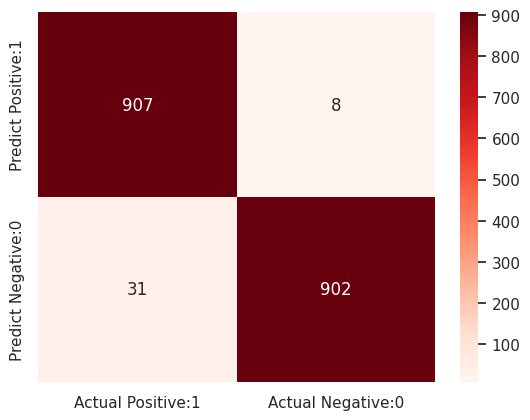

<Figure size 900x900 with 0 Axes>

In [92]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [93]:
#Score más importantes de las características del modelo
feature_scores = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Status_Encoded           0.482978
Position Name_Encoded    0.406351
Position ID_Encoded      0.069113
Turn Code_Encoded        0.027040
Function_Encoded         0.004263
Category_Encoded         0.003344
Director_Encoded         0.001620
Dep. Name_Encoded        0.001589
Nacionality_Encoded      0.001324
Manager_Encoded          0.000846
Business Unit_Encoded    0.000572
Plant_Encoded            0.000497
BP_Encoded               0.000462
Area_Encoded             0.000000
Dep. Class_Encoded       0.000000
Gender_Encoded           0.000000
GM_Encoded               0.000000
Employee Type_Encoded    0.000000
VP_Encoded               0.000000
Type_Encoded             0.000000
dtype: float32

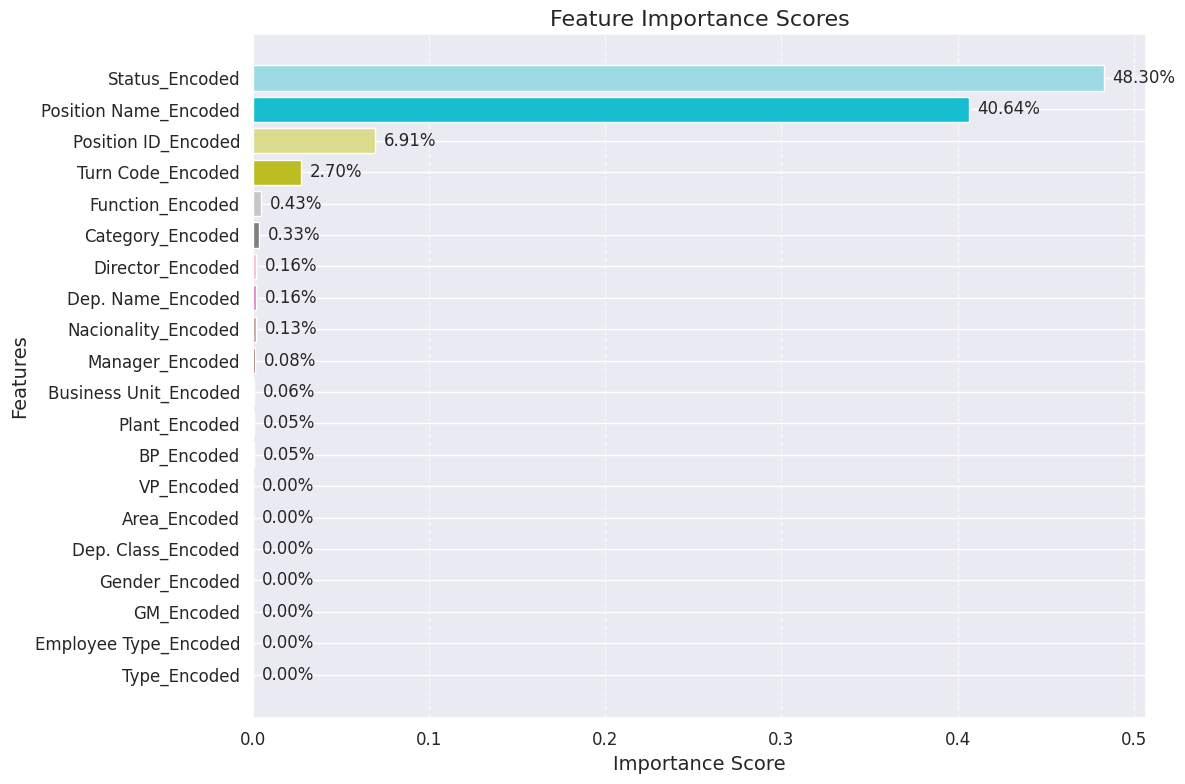

In [94]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_scores.sort_values(ascending=True).index, feature_scores.sort_values(ascending=True), color=plt.cm.tab20.colors)

# Añadir los porcentajes al final de cada barra
for bar, score in zip(bars, feature_scores.sort_values(ascending=True)):
    xval = bar.get_width()
    plt.text(xval + 0.005, bar.get_y() + bar.get_height()/2, f'{score:.2%}', ha='left', va='center')

# Mejorar la estética del gráfico
plt.title('Feature Importance Scores', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# **SUPPORT VECTOR CLASSIFIER (SVC)**
**Instanciar el Modelo**

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [96]:
svc = SVC(C=1000, gamma=0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=1000, gamma=0.0001, probability=True)

In [97]:
ysvc_pred = svc.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(svc.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(svc.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.9719
Precisión en el set de Test: 0.9686


# **KNeighborsClassifier**

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=2,algorithm='auto',metric='euclidean',weights='uniform')

#Recuerden: Si quiseramos seleccionar una métrica particular para calcular las distancias incluiriamos todo lo que se observa  más alla de señalar el número de K. En caso contrario dejamos el scrit hasta el tamaño de K.

knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [99]:
y_predknn2 = knn2.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(knn2.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(knn2.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.9869
Precisión en el set de Test: 0.9751


# **GaussianNB**

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [101]:
y_predGNB = gnb.predict(X_test)

print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.9681
Precisión en el set de Test: 0.9610


# **REGRESIÓN LOGÍSTICA**

In [102]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [103]:
y_predRL = LR.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.89 %


In [104]:
y_predRL = LR.predict(X_test)
print('Precisión en el set de Entrenamiento: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Precisión en el set de Test: {:.4f}'
     .format(LR.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.9767
Precisión en el set de Test: 0.9729


In [105]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_predRL, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_predRL, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_predRL, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_predRL, average='micro')))

F-1 Score :  0.9729437229437229
Precision Score :  0.9729437229437229
Recall Score :  0.9729437229437229
Jaccard Score :  0.9473129610115911


# Curvas Roc

La curva ROC (Receiver Operating Characteristic) se utiliza para evaluar el rendimiento de los algoritmos de clasificación binaria.
La curva ROC se genera calculando y trazando la tasa de verdaderos positivos (TPR) contra la tasa de falsos positivos (FPR) para un solo clasificador en una variedad de umbrales.


#Regresión Logística ROC

In [106]:
# sacar las probabilidades
y_pred_prob = LR.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

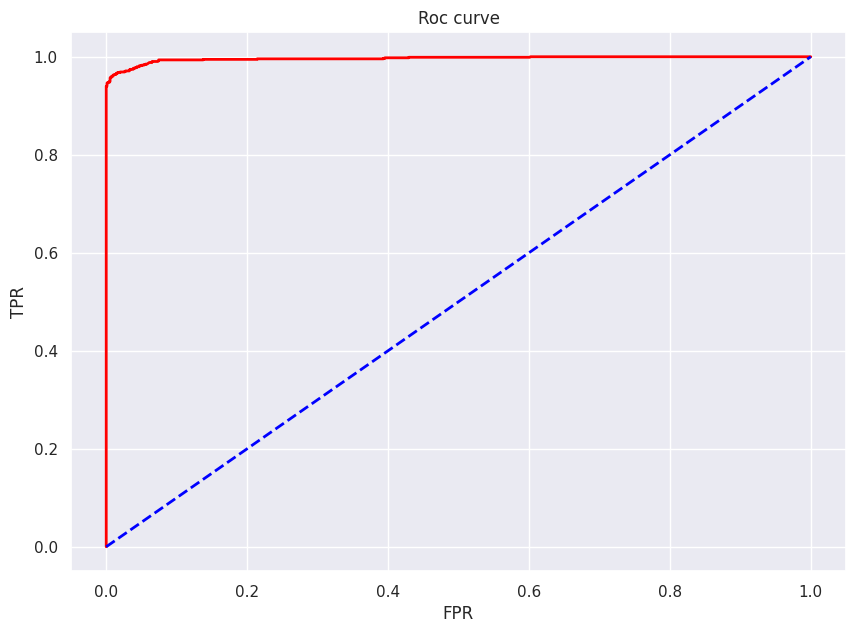

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#NB ROC

In [108]:
# sacar las probabilidades
y_pred_prob = gnb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

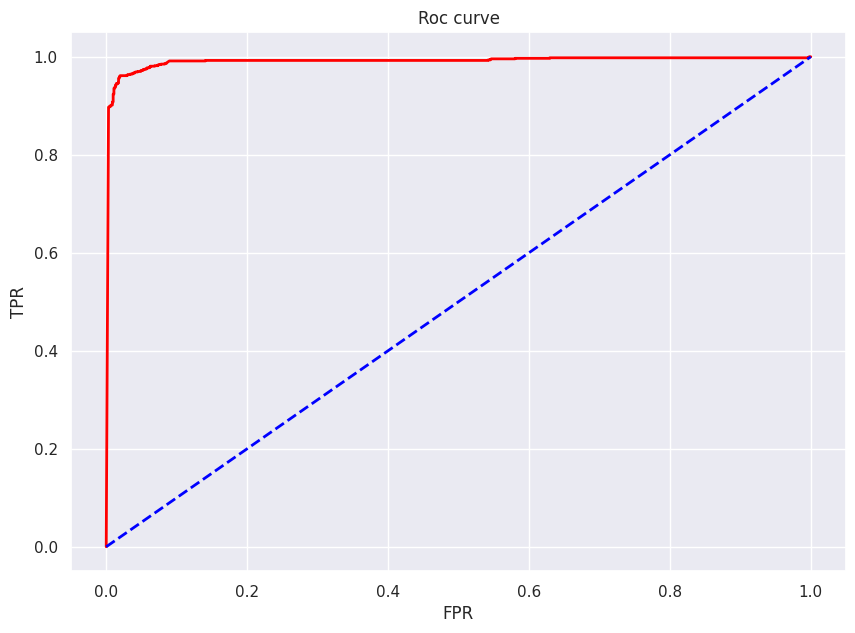

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#KNN ROC

In [110]:
# sacar las probabilidades
y_pred_prob = knn2.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

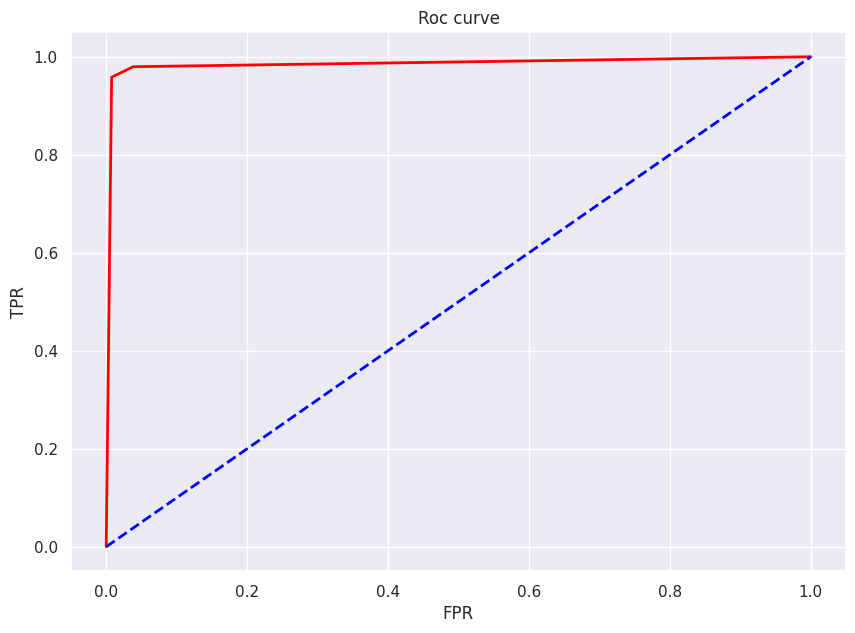

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#Support Vector Machine ROC

In [112]:
# sacar las probabilidades
y_pred_prob = svc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

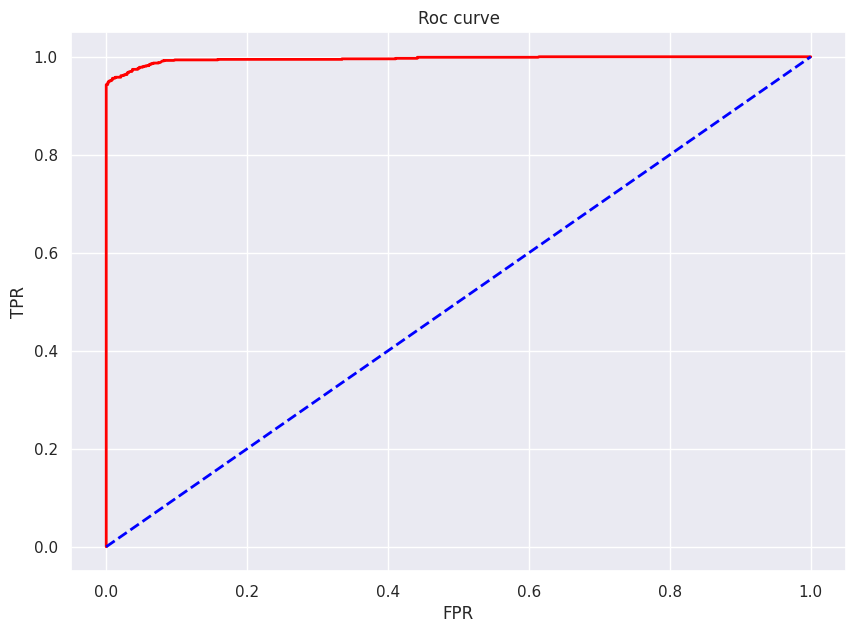

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#Random Forest ROC

In [114]:
# sacar las probabilidades
y_pred_prob = rfc.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

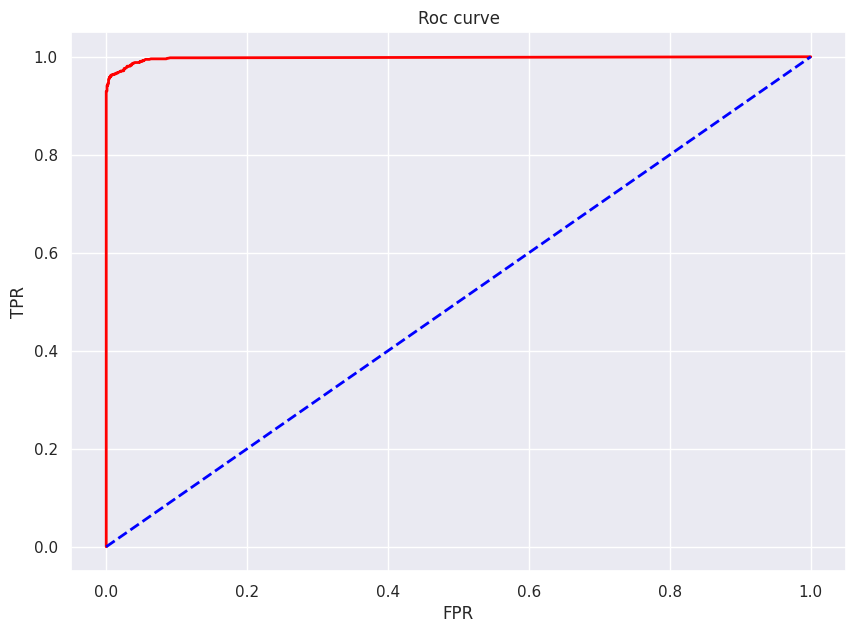

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#Decision Tree ROC

In [116]:
# sacar las probabilidades
y_pred_prob = clf_gini.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

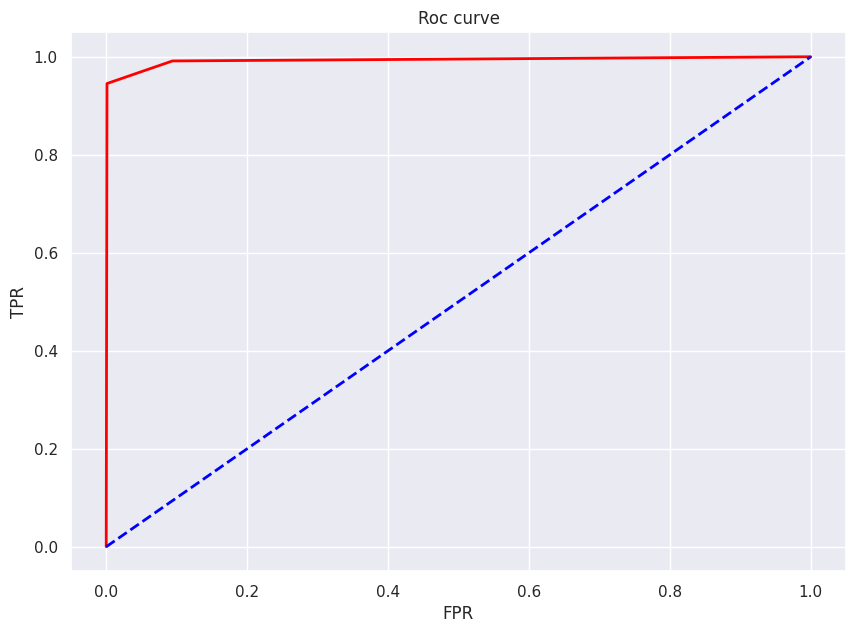

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

In [118]:
# sacar las probabilidades
y_pred_prob = clf_en.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

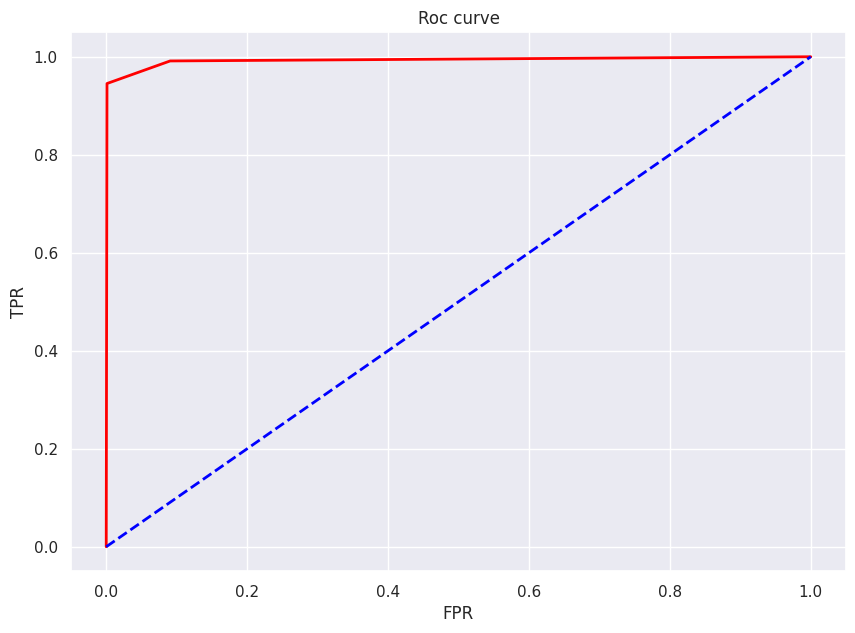

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

#(Boosting) XGBoost** ROC

In [120]:
# sacar las probabilidades
y_pred_prob = xgb.predict_proba(X_test) [:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)

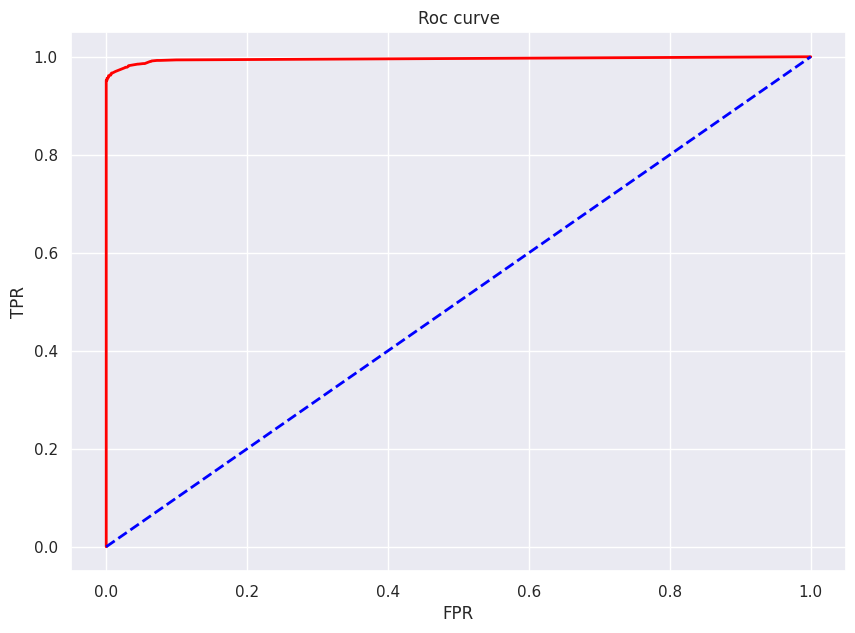

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 7))
# Agregar ROC
plt.plot(fpr, tpr, color="red", lw=2, label="Roc curve")
## Random FPR y TPR
plt.plot([0,1], [0,1], color="blue", lw=2, linestyle="--")
## Titulo y etiquetas
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc curve")
plt.show()

# Inferencia

In [122]:
#Para la prediccion debe darse una lista con los datos en orden segun nominal_columns
#Y solo debe tener los datos correspondientes a nominal_columns
#Todos los datos importantes para el procesamiento estan guardados en la lista cara
def process_worker(data):
  processed_data = []
  for i in range(len(data)):
    processed_data.append(cara[i][data[i]])

  processed_data = np.array(processed_data).reshape(1,-1)
  return processed_data


In [123]:
#Guardamos todos los modelos en una lista
models = [
          LR,
          gnb,
          knn2,
          svc,
          rfc,
          clf_gini,
          clf_en,
          xgb,
          neural_n
]
#Sus nombres asociados
names = [
    "Regresión Logística",
    "GaussianNB",
    "KNN",
    "SVC",
    "Random Forest",
    "Decision Tree Gini",
    "Decision Tree Entropy",
    "XGBoost",
    "Neural Network"
]

In [279]:
#Esta funcion solo es para ver como los modelos funcionan para un id
def make_pred_with_id(id_data_frame,coded_info=False):
  dato_test_completo = df.iloc[id_data_frame] #Extraemos los datos de la base de datos
  dato_test = dato_test_completo[nominal_columns] #Extraemos los datos de la base de datos

  pdato = process_worker(dato_test) #Convertimos categorías a números.
  print("Infromacion del trabajador \n {}".format("-"*50))          #Imprime la información del trabajador
  for i in range(len(dato_test)):                                   #Imprime la información del trabajador
    data_to_show = pdato[0][i] if coded_info else dato_test.iloc[i] #Imprime la información del trabajador
    print("{}:{}".format(nominal_columns[i],data_to_show))          #Imprime la información del trabajador
  print("\nPrediccion de cada modelo \n {}".format("-"*50))         #Imprime la información del trabajador

  preds = [] #Todos las predicciones de guardan en esta lista
  for i,model in enumerate(models): #Sobre la lista de arriba nos devolverá el indice y el modelo, cada clase tiene sus propios atributos
    if i==8:                        #cada clase tiene sus propios atributos, esto es para la red neuronal (Keras y tensorflow)
      preds.append(np.array(model(pdato)[0]).round()) #cada clase tiene sus propios atributos, esto es para la red neuronal
    else:
      preds.append(model.predict(pdato)) #cada clase tiene sus propios atributos, esto es para todos los demás modelos

  for i in range(len(models)):  #Imprime todas las predicciones
    print("{}: {}".format(names[i],preds[i][0])) #Imprime todas las predicciones

  print("\nValor real en el set de datos: {}".format(dato_test_completo["Attrition 3 years"])) #Imprime el valor real

In [280]:
make_pred_with_id(np.random.randint(0,len(df))) #Invocamos la función, da un valor aleatorio de la lista

Infromacion del trabajador 
 --------------------------------------------------
Dep. Name:Direct (EC)
Dep. Class:Exclusive
Position Name:Operador Experto
Position ID:7 - Operador Experto
Employee Type:Sindicalizado
Nacionality:Mexicano
Status:Active
Turn Code:4163
Gender:Male
Plant:SPP
Type:Direct
Category:DNMX | SPP Administration/Manufacturing
Function:EC Eng/Prod
Area:PR. EC
Business Unit:EC
Manager:Guillermo Sánchez
GM:Francisco Javier Torres
Director:Raúl Medina
VP:Raúl Medina
BP:Hiroshi Tanaka

Prediccion de cada modelo 
 --------------------------------------------------
Regresión Logística: 1
GaussianNB: 1
KNN: 1
SVC: 1
Random Forest: 1
Decision Tree Gini: 1
Decision Tree Entropy: 1
XGBoost: 1
Neural Network: 1.0

Valor real en el set de datos: 1


In [313]:
make_pred_with_id(13) #Invocamos la función, da un valor aleatorio de la lista

Infromacion del trabajador 
 --------------------------------------------------
Dep. Name:Logistics Components (EC)
Dep. Class:Exclusive
Position Name:Operador Experto
Position ID:7 - Operador Experto
Employee Type:Sindicalizado
Nacionality:Mexicano
Status:Active
Turn Code:4165
Gender:Female
Plant:SPP
Type:Direct
Category:DNMX | SPP Plant function
Function:PC Bajio
Area:WH (SPP & IPP)
Business Unit:EC
Manager:José Luis Sánchez
GM:Ricardo Pérez
Director:Carlos Alberto Sánchez
VP:Takuya Suzuki
BP:Hiroshi Tanaka

Prediccion de cada modelo 
 --------------------------------------------------
Regresión Logística: 1
GaussianNB: 1
KNN: 1
SVC: 1
Random Forest: 1
Decision Tree Gini: 1
Decision Tree Entropy: 1
XGBoost: 1
Neural Network: 1.0

Valor real en el set de datos: 1


In [281]:
from IPython.display import clear_output  #Esta es la parte chida

In [282]:
#Recibimos informacion del teclado acerca de el trabajador
#Se va a regresar la informacion lista para la prediccion
#Ademas se devolveran los nombres asociados a la informacion del cliente(p.ej. el departamento codificado y el nombre)
def submit_worker():
  print("Seleccione basado en las opciones mostradas")
  data_worker = []
  data_names_worker = []
  for i,column in enumerate(nominal_columns):
    clear_output()
    print("{}\n{}\n{}".format(50*"-",column,50*"-"))
    for n,k in enumerate(cara[i].keys()):
      print("{}.{}".format(n,k))
    inp = int(input("Opcion: "))
    data_names_worker.append(cara[i].keys()[inp])
    data_worker.append(cara[i][list(cara[i].keys())[inp]])

  clear_output()
  print("Datos ingresados")
  return data_worker,data_names_worker


In [283]:
#Funcion de inferencia de todos los modelos
#Se va a poner la informacion del trabajador, luego se va a mostrar la informacion ingresada
#Despues se hara la prediccion con todos los modelos y se va a mostrar el resultado

def make_pred_with_new_data(coded_info=False):
  new_data,names_data = submit_worker()
  print("Infromacion del trabajador \n {}".format("-"*50))
  for i in range(len(names_data)):
    data_to_show = new_data[0][i] if coded_info else names_data[i]
    print("{}:{}".format(nominal_columns[i],data_to_show))
  print("\nPrediccion de cada modelo \n {}".format("-"*50))
  new_data=np.array(new_data).reshape(1,-1)
  preds = []
  for i,model in enumerate(models):
    if i==8:
      preds.append(model(new_data)[0])
    else:
      preds.append(model.predict(new_data))

  for i in range(len(models)):
    print("{}: {}".format(names[i],preds[i][0]))


In [315]:

#Todo funciona
make_pred_with_new_data()

Datos ingresados
Infromacion del trabajador 
 --------------------------------------------------
Dep. Name:740K Filter Welding AT
Dep. Class:Exclusive
Position Name:3Production
Position ID:1 - Entrenamiento B1
Employee Type:Expatriados
Nacionality:Mexicano
Status:Quit
Turn Code:4162
Gender:Male
Plant:APP
Type:SGA
Category:DNMX | HR-IT-FAC-GA
Function:APP-GPP SHE/TPM Planning
Area:Purchashing
Business Unit:Common
Manager:Luis Morales
GM:Andrés Torres
Director:Eduardo Soto
VP:Noé Pérez
BP:Yuki Tanaka

Prediccion de cada modelo 
 --------------------------------------------------
Regresión Logística: 0
GaussianNB: 0
KNN: 0
SVC: 0
Random Forest: 0
Decision Tree Gini: 0
Decision Tree Entropy: 0
XGBoost: 0
Neural Network: 3.7383542803581804e-05
